In [1]:
!pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd

fields = pd.read_csv('ekoniva-dataset/fields_new.csv', encoding='utf-8')
value = pd.read_csv('ekoniva-dataset/value_new.csv', encoding='utf-8')
works = pd.read_csv('ekoniva-dataset/works_new.csv', encoding='utf-8', parse_dates=['start_date', 'end_date'], dayfirst=True)

/var/folders/pn/0bn7dksx05d8k5q8rpx3vxm80000gn/T/ipykernel_48925/235830486.py:5: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  works = pd.read_csv('ekoniva-dataset/works_new.csv', encoding='utf-8', parse_dates=['start_date', 'end_date'], dayfirst=True)
/var/folders/pn/0bn7dksx05d8k5q8rpx3vxm80000gn/T/ipykernel_48925/235830486.py:5: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  works = pd.read_csv('ekoniva-dataset/works_new.csv', encoding='utf-8', parse_dates=['start_date', 'end_date'], dayfirst=True)


In [3]:
fields.shape

(16060, 18)

In [4]:
fields.head()

field region land_type  fertility_score  season  \
0  22.47.01.001.01  Алтай     пашня              NaN    2023   
1  22.47.01.001.02  Алтай     пашня              NaN    2023   
2  22.47.01.002.00  Алтай     пашня              4.0    2023   
3  22.47.01.003.00  Алтай     пашня              4.0    2023   
4  22.47.01.004.00  Алтай     пашня              3.0    2023   

                crop        crop_predecessor  crop_yearold    area   hybrid  \
0  Оз.пшеница мягкая  Пар; Яр.пшеница мягкая           NaN  306.22  Скипетр   
1                Пар  Пар; Яр.пшеница мягкая           NaN   63.16      NaN   
2                Пар       Яр.пшеница мягкая           NaN  485.79      NaN   
3  Оз.пшеница мягкая                     Пар           NaN  452.25  Скипетр   
4  Оз.пшеница мягкая                     Пар           NaN  269.64  Скипетр   

  reproduction seed_origin   technology  yield_plan    p2o5    k2o  humus  \
0           ЭС    Покупные  минимальная         3.8  221.05  206.3   4.05   
1          NaN         NaN  минимальная         NaN  221.05  206.3   4.05   
2          NaN         NaN          NaN         NaN  199.80  186.0   3.50   
3           ЭС    Покупные  минимальная         3.8  186.50  174.8   5.90   
4           ЭС    Покупные  минимальная         3.8  166.60  147.9   5.60   

     ph  
0  5.25  
1  5.25  
2  5.20  
3  5.40  
4  5.40

In [5]:
fields['land_type'].value_counts()

land_type
пашня                    15642
луг                        291
пастбище естественное      127
Name: count, dtype: int64

In [6]:
fields['region'].value_counts()

region
Калуга         4694
Воронеж        4037
Рязань         1964
Новосибирск    1250
Курск           935
Татарстан       787
Оренбург        543
Москва          504
Башкирия        481
Алтай           257
Самара          241
Тюмень          218
СПб             149
Name: count, dtype: int64

In [7]:
fields['season'].value_counts()

season
2024    8151
2023    7909
Name: count, dtype: int64

In [8]:
counts = fields['crop'].value_counts().reset_index()
counts.columns = ['crop', 'count']
counts[counts['count'] > 0].tail(10)

crop  count
113                    Козлятник 1 г.ж семена      1
114    Мн.травы (эспарцет+люцерна) 1г.ж. сем.      1
115  Одн.тр.овёс с подс.(мн.травосм.корм)корм      1
116        Яр.ячмень с подс.(мн.травосм.корм)      1
117             Горох с под(клевер белый сем)      1
118                   Фестулолиум пр.лет корм      1
119            Овёс с подс.(пастб.травосмесь)      1
120      Мн.травы рожь многолетняя 1 г.ж корм      1
121                     Подсолнечник (аренда)      1
122                      Козлятник 1 г.ж.корм      1

In [9]:
fields[fields['crop'].str.contains(r'\+', case=False, na=False)].shape

(880, 18)

In [10]:
fields[fields['crop'].str.contains(r'\+', case=False, na=False)]['technology'].value_counts()

technology
минимальная                 412
классическая с плугом       250
нулевая с прямым посевом     29
гибридизация                  3
Name: count, dtype: int64

In [11]:
fields[fields['crop'].str.contains(r'\+', case=False, na=False)]['crop'].unique()

array(['Одн.тр.(вика+овёс)корм', 'Эсп.+костр.пр.лет корм',
       'Эсп.+житн.пр.лет корм', 'Эсп.+костр.1 г.ж.корм',
       'Одн.тр(оз.тритикале+оз.вика) корм',
       'Одн.тр(оз.тритикале+оз.вика) семена', 'Одн.тр.(вика+овёс)сем.',
       'Одн.тр.райграс одн.с подс.(кл.кр.+тим.корм)корм',
       'Кл.кр.+тим.1 г.ж.корм', 'Кл.кр.+тим.пр.лет корм',
       'Одн.тр.(смеси з.и з.б.)с подс.(кл.кр.+тим.корм)корм',
       'Одн.тр.(вика+овёс)с подс.(кл.кр.+тим.корм)корм',
       'Одн.тр.(вика+овёс)с подс.(кл.кр.+тим.корм)сем.',
       'Кл.кр.+фестул.пр.лет корм', 'Кл.кр.+райгр.пастб.пр.лет корм',
       'Яр.пшеница мягк.с подс.(кл.кр.+тим.корм)',
       'Одн.тр.(вика+овёс)с подс.(кл.кр.сем)семена',
       'Люц.+кострец пр.лет корм',
       'Мн.травы (эспарцет+люцерна) 1г.ж. сем.', 'Эсп.+костр.пр.лет сем.',
       'Одн.тр.(оз.пшеница+оз.вика)корм', 'Одн.тр.(оз.рожь+оз.вика)корм',
       'Овёс с подс.(кл.кр+тим.корм)'], dtype=object)

In [12]:
fields[~fields['crop'].str.contains(r'\+', case=False, na=False)]['crop'].unique()

array(['Оз.пшеница мягкая', 'Пар', 'Залежь, лес', 'Яр.пшеница мягкая',
       'Залежь', 'Залежь, кустарник', 'Люцерна 1 г.ж.корм',
       'Кукуруза силос', 'Люцерна пр.лет корм', 'Строительство',
       'Яр.ячмень', 'Чечевица', 'Соя', 'Люпин белый', 'Подсолнечник',
       'Одн.тр.суданская тр.корм.', 'Лён масличный',
       'Козлятник пр.лет корм', 'Яр.пшеница твёрдая',
       'Эспарцет 1 г.ж.корм', 'Не используется, чужая земля',
       'Мн.тр.разн.бот.сост.пр.лет корм', 'Эспарцет пр.лет корм',
       'Люцерна пр.лет сем.', 'Эспарцет пр.лет сем.', 'Оз.рыжик', 'Загон',
       'Сорго зерновое', 'Кукуруза зерно', 'Подсолнечник кондит.', 'Луг',
       'Сах.свекла', 'Кукуруза корнаж', 'Мн.травосм.пр.лет корм',
       'Одн.тр.оз.рожь корм', 'Одн.тр.озимая тритикале корм',
       'Эспарцет 1 г.ж.сем.', 'Подсолнечник (аренда)', 'Аренда',
       'Одн.тр.оз.пшеница мягк.корм', 'Люцерна 1 г.ж.сем.',
       'Оз.тритикале', 'Одн.тр.овёс корм', 'Нут', 'Мн.травосм.1 г.ж.корм',
       'Пастбище на па

In [13]:
fields[~fields['crop'].str.contains(r'\+', case=False, na=False)]['crop'].unique().shape

(100,)

In [14]:
fields[~fields['crop'].str.contains(r'\+', case=False, na=False)].shape

(15180, 18)

In [15]:
fields[fields['crop'].str.contains('травосм', case=False, na=False)].shape

(58, 18)

In [16]:
fields[fields['crop'].str.contains('травосм', case=False, na=False)][['crop', 'crop_predecessor']]

crop  \
497                               Мн.травосм.пр.лет корм   
507                               Мн.травосм.пр.лет корм   
1614                               Мн.травосм.1 г.ж.корм   
3444   Смесь зерн.и зернобоб.с подс.(мн.травосм.корм)...   
3445   Смесь зерн.и зернобоб.с подс.(мн.травосм.корм)...   
3446   Смесь зерн.и зернобоб.с подс.(мн.травосм.корм)...   
3525   Смесь зерн.и зернобоб.с подс.(мн.травосм.корм)...   
3560                               Мн.травосм.1 г.ж.корм   
3565                               Мн.травосм.1 г.ж.корм   
3572   Смесь зерн.и зернобоб.с подс.(мн.травосм.корм)...   
3581                               Мн.травосм.1 г.ж.корм   
3593                      Овёс с подс.(пастб.травосмесь)   
3594   Смесь зерн.и зернобоб.с подс.(мн.травосм.корм)...   
3609   Смесь зерн.и зернобоб.с подс.(мн.травосм.корм)...   
3610   Смесь зерн.и зернобоб.с подс.(мн.травосм.корм)...   
3614   Смесь зерн.и зернобоб.с подс.(мн.травосм.корм)...   
3617   Смесь зерн.и зернобоб.с подс.(мн.травосм.корм)...   
3618   Смесь зерн.и зернобоб.с подс.(мн.травосм.корм)...   
5426                              Мн.травосм.пр.лет корм   
5432                              Мн.травосм.пр.лет корм   
5435                              Мн.травосм.пр.лет корм   
5450                              Мн.травосм.пр.лет корм   
5458                              Мн.травосм.пр.лет корм   
5729                              Мн.травосм.пр.лет корм   
5736                              Мн.травосм.пр.лет корм   
6013                              Мн.травосм.пр.лет корм   
6181                  Яр.ячмень с подс.(мн.травосм.корм)   
6182            Одн.тр.овёс с подс.(мн.травосм.корм)корм   
6193                              Мн.травосм.пр.лет корм   
6198                              Мн.травосм.пр.лет корм   
7400                              Мн.травосм.пр.лет корм   
7437                              Мн.травосм.пр.лет корм   
8423                              Мн.травосм.пр.лет корм   
8434                              Мн.травосм.пр.лет корм   
11552  Смесь зерн.и зернобоб.с подс.(мн.травосм.корм)...   
11553  Смесь зерн.и зернобоб.с подс.(мн.травосм.корм)...   
11557                             Мн.травосм.пр.лет корм   
11560  Смесь зерн.и зернобоб.с подс.(мн.травосм.корм)...   
11572  Смесь зерн.и зернобоб.с подс.(мн.травосм.корм)...   
11577                             Мн.травосм.пр.лет корм   
11578                             Мн.травосм.пр.лет корм   
11579                             Мн.травосм.пр.лет корм   
11594                             Мн.травосм.пр.лет корм   
11595                             Мн.травосм.пр.лет корм   
11602  Смесь зерн.и зернобоб.с подс.(мн.травосм.корм)...   
11603  Смесь зерн.и зернобоб.с подс.(мн.травосм.корм)...   
13499                             Мн.травосм.пр.лет корм   
13505                             Мн.травосм.пр.лет корм   
13508                             Мн.травосм.пр.лет корм   
13523                             Мн.травосм.пр.лет корм   
13531                             Мн.травосм.пр.лет корм   
13768                             Мн.травосм.пр.лет корм   
13805                             Мн.травосм.пр.лет корм   
15469                             Мн.травосм.пр.лет корм   
15470                             Мн.травосм.пр.лет корм   
15472                             Мн.травосм.пр.лет корм   
15483                             Мн.травосм.пр.лет корм   
15734                             Мн.травосм.пр.лет корм   

                                        crop_predecessor  
497                               Мн.травосм.пр.лет корм  
507                               Мн.травосм.пр.лет корм  
1614                              Эсп.+костр.пр.лет корм  
3444                                   Оз.пшеница мягкая  
3445                                   Оз.пшеница мягкая  
3446                                   Оз.пшеница мягкая  
3525                                      Кукуруза силос  
3560                                   

In [17]:
fields[fields['crop'].str.contains('\+', case=False, na=False)][['crop', 'crop_predecessor']]

crop       crop_predecessor
57     Одн.тр.(вика+овёс)корм         Кукуруза силос
58     Одн.тр.(вика+овёс)корм         Кукуруза силос
63     Одн.тр.(вика+овёс)корм         Кукуруза силос
67     Одн.тр.(вика+овёс)корм         Кукуруза силос
86     Одн.тр.(вика+овёс)корм              Яр.ячмень
...                       ...                    ...
16053  Одн.тр.(вика+овёс)корм           Оз.тритикале
16054  Одн.тр.(вика+овёс)корм          Кормовые бобы
16055  Одн.тр.(вика+овёс)корм  Козлятник пр.лет корм
16057  Одн.тр.(вика+овёс)корм      Яр.пшеница мягкая
16059  Одн.тр.(вика+овёс)корм           Оз.тритикале

[880 rows x 2 columns]

In [18]:
fields[fields['crop'].str.contains('травосм', case=False, na=False)]

field       region land_type  fertility_score  season  \
497    36.02.02.043.00      Воронеж     пашня              2.0    2023   
507    36.02.02.052.00      Воронеж     пашня              3.0    2023   
1614   36.14.04.060.00      Воронеж     пашня              NaN    2023   
3444   40.16.01.001.00       Калуга     пашня              4.0    2023   
3445   40.16.01.002.00       Калуга     пашня              4.0    2023   
3446   40.16.01.003.00       Калуга     пашня              4.0    2023   
3525   40.16.08.009.00       Калуга     пашня              4.0    2023   
3560   40.16.08.041.00       Калуга     пашня              4.0    2023   
3565   40.16.08.045.01       Калуга     пашня              4.0    2023   
3572   40.16.08.052.00       Калуга     пашня              4.0    2023   
3581   40.16.08.061.00       Калуга     пашня              4.0    2023   
3593   40.16.08.067.00       Калуга     пашня              4.0    2023   
3594   40.16.08.068.00       Калуга     пашня              4.0    2023   
3609   40.16.08.083.00       Калуга     пашня              4.0    2023   
3610   40.16.08.084.01       Калуга     пашня              4.0    2023   
3614   40.16.08.086.01       Калуга     пашня              4.0    2023   
3617   40.16.08.088.00       Калуга     пашня              4.0    2023   
3618   40.16.08.089.00       Калуга     пашня              4.0    2023   
5426   54.17.02.022.00  Новосибирск     пашня              4.0    2023   
5432   54.17.02.025.02  Новосибирск     пашня              NaN    2023   
5435   54.17.03.001.00  Новосибирск     пашня              4.0    2023   
5450   54.17.03.012.01  Новосибирск     пашня              0.0    2023   
5458   54.17.03.012.09  Новосибирск     пашня              0.0    2023   
5729   54.17.12.063.01  Новосибирск     пашня              4.0    2023   
5736   54.17.12.072.00  Новосибирск     пашня              4.0    2023   
6013   16.13.16.011.00     Оренбург     пашня              5.0    2023   
6181   56.28.10.002.00     Оренбург     пашня              4.0    2023   
6182   56.28.10.003.01     Оренбург     пашня              4.0    2023   
6193   56.28.10.013.00     Оренбург     пашня              4.0    2023   
6198   56.28.10.018.00     Оренбург     пашня              4.0    2023   
7400   47.22.06.046.01          СПб     пашня              3.0    2023   
7437   16.13.12.018.00    Татарстан     пашня              3.0    2023   
8423   36.02.02.043.00      Воронеж     пашня              2.0    2024   
8434   36.02.02.052.00      Воронеж     пашня              3.0    2024   
11552  40.16.08.046.00       Калуга     пашня              4.0    2024   
11553  40.16.08.049.00       Калуга     пашня              4.0    2024   
11557  40.16.08.052.00       Калуга     пашня              4.0    2024   
11560  40.16.08.055.00       Калуга     пашня              4.0    2024   
11572  40.16.08.063.06       Калуга     пашня              4.0    2024   
11577  40.16.08.067.00       Калуга     пашня              4.0    2024   
11578  40.16.08.068.01       Калуга     пашня              4.0    2024   
11579  40.16.08.068.02       Калуга     пашня              4.0    2024   
11594  40.16.08.083.00       Калуга     пашня              4.0    2024   
11595  40.16.08.084.01       Калуга     пашня              4.0    2024   
11602  40.16.08.088.00       Калуга     пашня              4.0    2024   
11603  40.16.08.089.00       Калуга     пашня              4.0    2024   
13499  54.17.02.022.00  Новосибирск     пашня              4.0    2024   
13505  54.17.02.025.02  Новосибирск     пашня              NaN    2024   
13508  54.17.03.001.00  Новосибирск     пашня              4.0    2024   
13523  54.17.03.012.01  Новосибирск     пашня              0.0    2024   
13531  54.17.03.012.09  Новосибирск     пашня              0.0    2024   
13768  54.17.12.025.02  Новосибирск     пашня              3.0    2024   
13805  54.17.12.072.01  Новосибирск     пашня              4.0    2024   
15469  47.22.06.002.0

In [19]:
counts = fields['crop_predecessor'].value_counts().reset_index()
counts.columns = ['crop_predecessor', 'count']
counts[counts['count'] > 100]

crop_predecessor  count
0              Залежь, лес   2725
1           Кукуруза силос   1749
2      Люцерна пр.лет корм   1298
3        Оз.пшеница мягкая   1130
4        Яр.пшеница мягкая    902
5                      Пар    783
6                      Соя    756
7           Кукуруза зерно    741
8                Яр.ячмень    513
9       Люцерна 1 г.ж.корм    462
10                  Залежь    333
11            Подсолнечник    308
12           Лён масличный    297
13                     Луг    291
14  Эсп.+костр.пр.лет корм    273
15                Чечевица    250
16       Пастбище на пашне    245
17                   Горох    177
18         Кукуруза корнаж    169
19              Сах.свекла    147
20       Залежь, кустарник    141
21   Пастбище естественное    140
22  Кл.кр.+тим.пр.лет корм    113

In [20]:
counts = fields['hybrid'].value_counts().reset_index()
counts.columns = ['hybrid', 'count']
counts[counts['count'] > 100]

hybrid  count
0     Смесь сортов    531
1         Ликамеро    420
2          Скипетр    304
3         БН 06-18    291
4         Галифакс    258
5           Дакота    248
6            Сарга    242
7          Аргента    186
8       Каскад 166    175
9    Песчаный 1251    173
10          Рэдкот    164
11          Кермит    155
12         Маргрет    154
13        Талисман    146
14           Верко    135
15           Микси    115
16     Росс 140 СВ    112
17  Кинельская 100    112
18     ОАК Пруденс    107
19     Льговская 4    106
20          Планет    102

In [21]:
fields['reproduction'].value_counts()

reproduction
F1                   2413
РС-1                 2097
ЭС                   1048
РС-2                  959
РСт                   744
Смесь репродукций     327
РС-3                  307
СЭ                    158
ОС                     36
ПР-2                   36
ПР-1                   35
Без репродукции        33
ПР                      1
Name: count, dtype: int64

In [22]:
fields['seed_origin'].value_counts()

seed_origin
Покупные           5125
Свои               3240
Свои + покупные     103
Name: count, dtype: int64

In [23]:
fields['technology'].value_counts()

technology
минимальная                 4794
классическая с плугом       2936
нулевая с прямым посевом     998
гибридизация                  38
Name: count, dtype: int64

In [24]:
value.head()

field inv_item_type inv_item_name  inv_item_weight inv_item_unit  \
0  36.01.21.025.01     Удобрения  Удобрение 31          15017.6            кг   
1  36.14.12.064.00     Удобрения  Удобрение 31           6500.0            м3   
2  36.14.16.008.00     Удобрения  Удобрение 49           7865.0             т   
3  36.14.16.008.00     Удобрения  Удобрение 49          10985.0             т   
4  36.14.16.008.00     Удобрения  Удобрение 49          10985.0             т   

   inv_item_dose        inv_item_date                               work_id  
0          260.0  2024-10-28 00:00:00  E3A7DAEB-D124-4685-ADE1-199818C77361  
1           65.0  2024-10-28 00:00:00  0AB8C8D7-04BD-4483-98B2-3E062CDD7E3E  
2           65.0  2024-10-28 00:00:00  00E51F81-0A4F-4983-B068-877A089FFD33  
3           65.0  2024-10-28 00:00:00  150F0150-8061-4CE9-9570-B112CBAD7C51  
4           65.0  2024-10-28 00:00:00  D5D1EADB-D159-4CF8-8C2A-171517ACD403

In [25]:
value['inv_item_type'].value_counts()

inv_item_type
СЗР          100115
Удобрения     43008
Семена        27690
Name: count, dtype: int64

In [26]:
works.head()

season            field        work_type work_subtype start_date  \
0    2023  16.13.12.044.00  Обработка почвы  Боронование 2022-04-29   
1    2023  16.13.12.017.00  Обработка почвы  Боронование 2022-05-01   
2    2023  16.13.12.012.00  Обработка почвы  Боронование 2022-05-02   
3    2023  16.13.12.012.00  Обработка почвы  Боронование 2022-05-02   
4    2023  16.13.12.017.00  Обработка почвы  Боронование 2022-05-02   

    end_date    area                                          main_tech  \
0 2022-04-30   49.78  Трактор колесный Fendt 936 Vario, гос.ном. 050...   
1 2022-05-02  154.76  Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...   
2 2022-05-03   40.62  Трактор колесный Fendt 936 Vario, гос.ном. 050...   
3 2022-05-03   86.00  Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...   
4 2022-05-03   76.00  Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...   

                                         add_tech  \
0                            Арендованная техника   
1  Борона зубовая Veles АГС-22-2У.М, зав.ном. 789   
2                            Арендованная техника   
3  Борона зубовая Veles АГС-22-2У.М, зав.ном. 789   
4  Борона зубовая Veles АГС-22-2У.М, зав.ном. 789   

                           mech  proc_depth prod_purpose  prod_weight  \
0    Ахметсафин Айрат Рафикович        10.0          NaN          0.0   
1   Ямалетдинов Фарид Расыхович        10.0          NaN          0.0   
2  Мухаметзянов Ринат Айратович        10.0          NaN          0.0   
3        Шакиров Ринат Галиевич        10.0          NaN          0.0   
4        Шакиров Ринат Галиевич        10.0          NaN          0.0   

   Unnamed: 13  Unnamed: 14  prod_dry_perc  prod_humid  prod_impur  \
0          1.0          0.0            NaN         NaN         NaN   
1          1.0          0.0            NaN         NaN         NaN   
2          1.0          0.0            NaN         NaN         NaN   
3          1.0          0.0            NaN         NaN         NaN   
4          1.0          0.0            NaN         NaN         NaN   

   yield_fact                               work_id  
0         0.0  A06AD38A-5448-40EC-B095-4B8918B4AC10  
1         0.0  62B13DCE-FFB5-4E7A-8F1B-88930BD338EF  
2         0.0  D5884A6D-4710-4C0A-8E5A-878291B89846  
3         0.0  7A504837-1127-4315-ACF1-171AC80111BF  
4         0.0  7FE86DA8-614B-4EBE-85CB-6AF80C08689F

In [27]:
works['start_month'] = works['start_date'].dt.month
works['end_month'] = works['end_date'].dt.month
works['delta'] = works['end_date'] - works['start_date']
works['delta'].value_counts()[:30]

delta
0 days     133493
1 days      25607
2 days       2715
3 days       1017
4 days        581
5 days        375
7 days        235
6 days        212
8 days        171
9 days        126
31 days       114
10 days        95
14 days        69
11 days        65
15 days        60
13 days        56
30 days        56
12 days        52
16 days        37
32 days        33
17 days        28
18 days        27
33 days        26
27 days        25
19 days        23
34 days        22
22 days        21
23 days        20
20 days        18
61 days        14
Name: count, dtype: int64

In [28]:
works['mech'].shape[0]

174683

In [29]:
works['mech'].unique().shape[0]

1536

In [30]:
works['mech'].value_counts()

mech
НАЕМНЫЙ МЕХАНИЗАТОР                4045
Волошенко Владимир Николаевич       983
Рыжков Александр Викторович         620
Титарев Сергей Иванович             611
Белик Александр Николаевич          602
                                   ... 
Селиванов Алексей Владимирович        1
Ермохин Александр Александрович       1
Напалков Александр Михайлович         1
Солодилов Владимир Ильич              1
Бонин Иван Александрович              1
Name: count, Length: 1536, dtype: int64

In [31]:
works[works['mech'] == 'Бонин Иван Александрович']

season            field work_type work_subtype start_date   end_date  \
174532    2024  40.23.07.027.00    Уборка        Вывоз 2024-10-22 2024-10-22   

        area                                          main_tech add_tech  \
174532   5.0  Погрузчик фронтальный Telemaxagri TMA 650B, го...      NaN   

                            mech  ...  Unnamed: 13 Unnamed: 14  prod_dry_perc  \
174532  Бонин Иван Александрович  ...          0.0      4.7306           90.0   

        prod_humid  prod_impur  yield_fact  \
174532         NaN         NaN       4.256   

                                     work_id  start_month  end_month  delta  
174532  92AE91CA-7188-4347-9BD6-5E57E664B91A           10       10.0 0 days  

[1 rows x 23 columns]

In [32]:
works[works['mech'] == 'НАЕМНЫЙ МЕХАНИЗАТОР']['delta'].sum()

Timedelta('2159 days 00:00:00')

In [33]:
works[works['mech'] == 'НАЕМНЫЙ МЕХАНИЗАТОР']['delta'].value_counts()

delta
0 days      3137
1 days       617
2 days       102
3 days        66
4 days        35
5 days        32
10 days        7
6 days         6
11 days        6
8 days         5
7 days         5
9 days         4
18 days        4
34 days        2
13 days        2
31 days        1
22 days        1
15 days        1
33 days        1
30 days        1
116 days       1
21 days        1
20 days        1
16 days        1
17 days        1
70 days        1
Name: count, dtype: int64

In [34]:
works.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174683 entries, 0 to 174682
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   season         174683 non-null  int64          
 1   field          174683 non-null  object         
 2   work_type      174683 non-null  object         
 3   work_subtype   174683 non-null  object         
 4   start_date     174683 non-null  datetime64[ns] 
 5   end_date       165679 non-null  datetime64[ns] 
 6   area           174683 non-null  float64        
 7   main_tech      174683 non-null  object         
 8   add_tech       126143 non-null  object         
 9   mech           174683 non-null  object         
 10  proc_depth     42121 non-null   float64        
 11  prod_purpose   33861 non-null   object         
 12  prod_weight    174683 non-null  float64        
 13  Unnamed: 13    164174 non-null  float64        
 14  Unnamed: 14    164174 non-null  floa

In [35]:
works['work_type'].value_counts()

work_type
Уборка                59097
Обработка почвы       54129
Внесение СЗР          26460
Сев                   18081
Внесение удобрений    16916
Name: count, dtype: int64

In [36]:
works['work_subtype'].value_counts()

work_subtype
Обработка СЗР                             23790
Прямое комбайнирование                    23371
Культивация                               14490
Дискование                                14082
Внесение минеральных удобрений            13326
Сев без внесения удобрений                10240
Вспашка                                    9805
Кошение                                    8185
Сев с внесением удобрений                  7841
Вывоз                                      7520
Боронование                                7482
Прикатывание                               5677
Уборка силос/карнаж                        5577
Подбор (корм)                              5395
Сгребание в валки                          3879
Внесение СЗР и удобрений                   2629
Прессование                                2483
Внесение органических удобрений            2331
Глубокорыхление                            1453
Внесение жидких органических удобрений     1259
Мульчирование              

In [37]:
worker = works[works['mech'] == works['mech'][2]][['work_type', 'work_subtype', 'season', 'start_month', 'end_month']].reset_index()

In [38]:
movements = worker.sort_values(by='start_month')[['work_type', 'work_subtype']]

In [39]:
for i in range(movements.shape[0]):
    print(movements['work_type'][i], movements['work_subtype'][i])
    

Обработка почвы Боронование
Обработка почвы Вспашка
Обработка почвы Дискование
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Обработка почвы Вспашка
Уборка Кошение
Уборка Кошение
Обработка почвы Дискование
Обработка почвы Дискование
Обработка почвы Дискование
Обработка почвы Дискование
Обработка почвы Дискование
Обработка почвы Дискование
Обработка почвы Дискование
Обработка почвы Дискование
Обработка почвы Вспашка
Обработка почвы Вспашка
Обработка почвы Вспашка
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Кошение
Уборка Ко

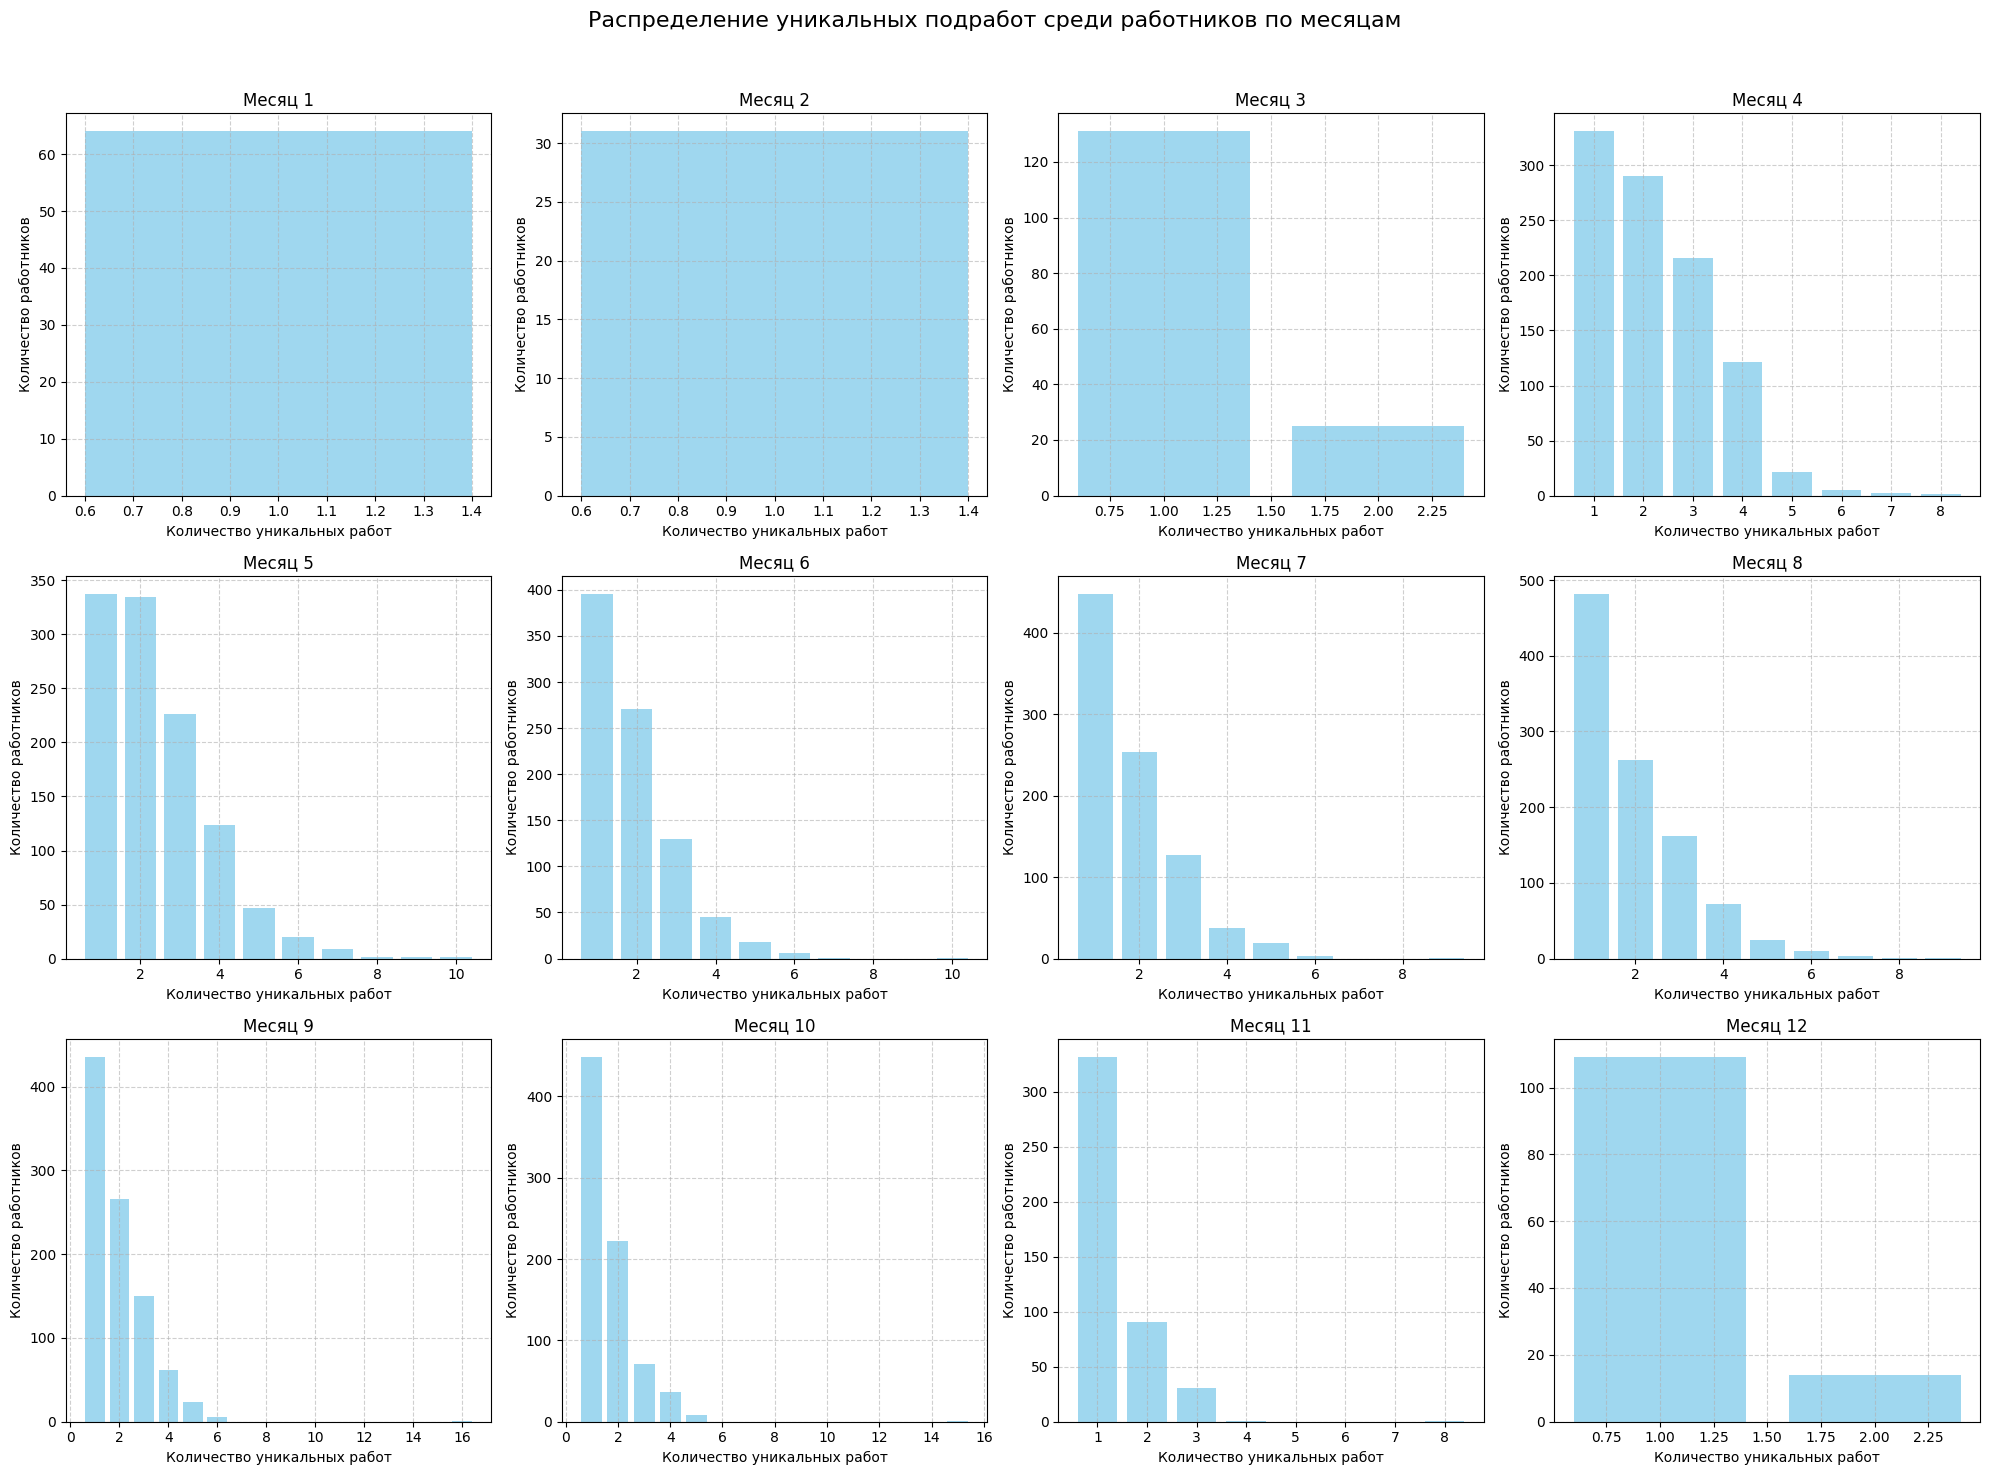

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

works['start_month'] = pd.to_datetime(works['start_date']).dt.month

work_summary = (
    works.groupby(['start_month', 'mech'])['work_subtype']
    .nunique()
    .reset_index(name='unique_work_types')
)

distribution = (
    work_summary.groupby(['start_month', 'unique_work_types'])
    .size()
    .reset_index(name='worker_count')
)

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for month in range(1, 13):
    ax = axes[month - 1]
    month_data = distribution[distribution['start_month'] == month]
    
    ax.bar(month_data['unique_work_types'], month_data['worker_count'], color='skyblue', alpha=0.8)
    ax.set_title(f'Месяц {month}')
    ax.set_xlabel('Количество уникальных работ')
    ax.set_ylabel('Количество работников')
    ax.grid(True, linestyle='--', alpha=0.6)

for ax in axes[12:]:
    fig.delaxes(ax)

fig.suptitle('Распределение уникальных подработ среди работников по месяцам', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('work_bars.png', dpi=300, bbox_inches='tight')
plt.show()

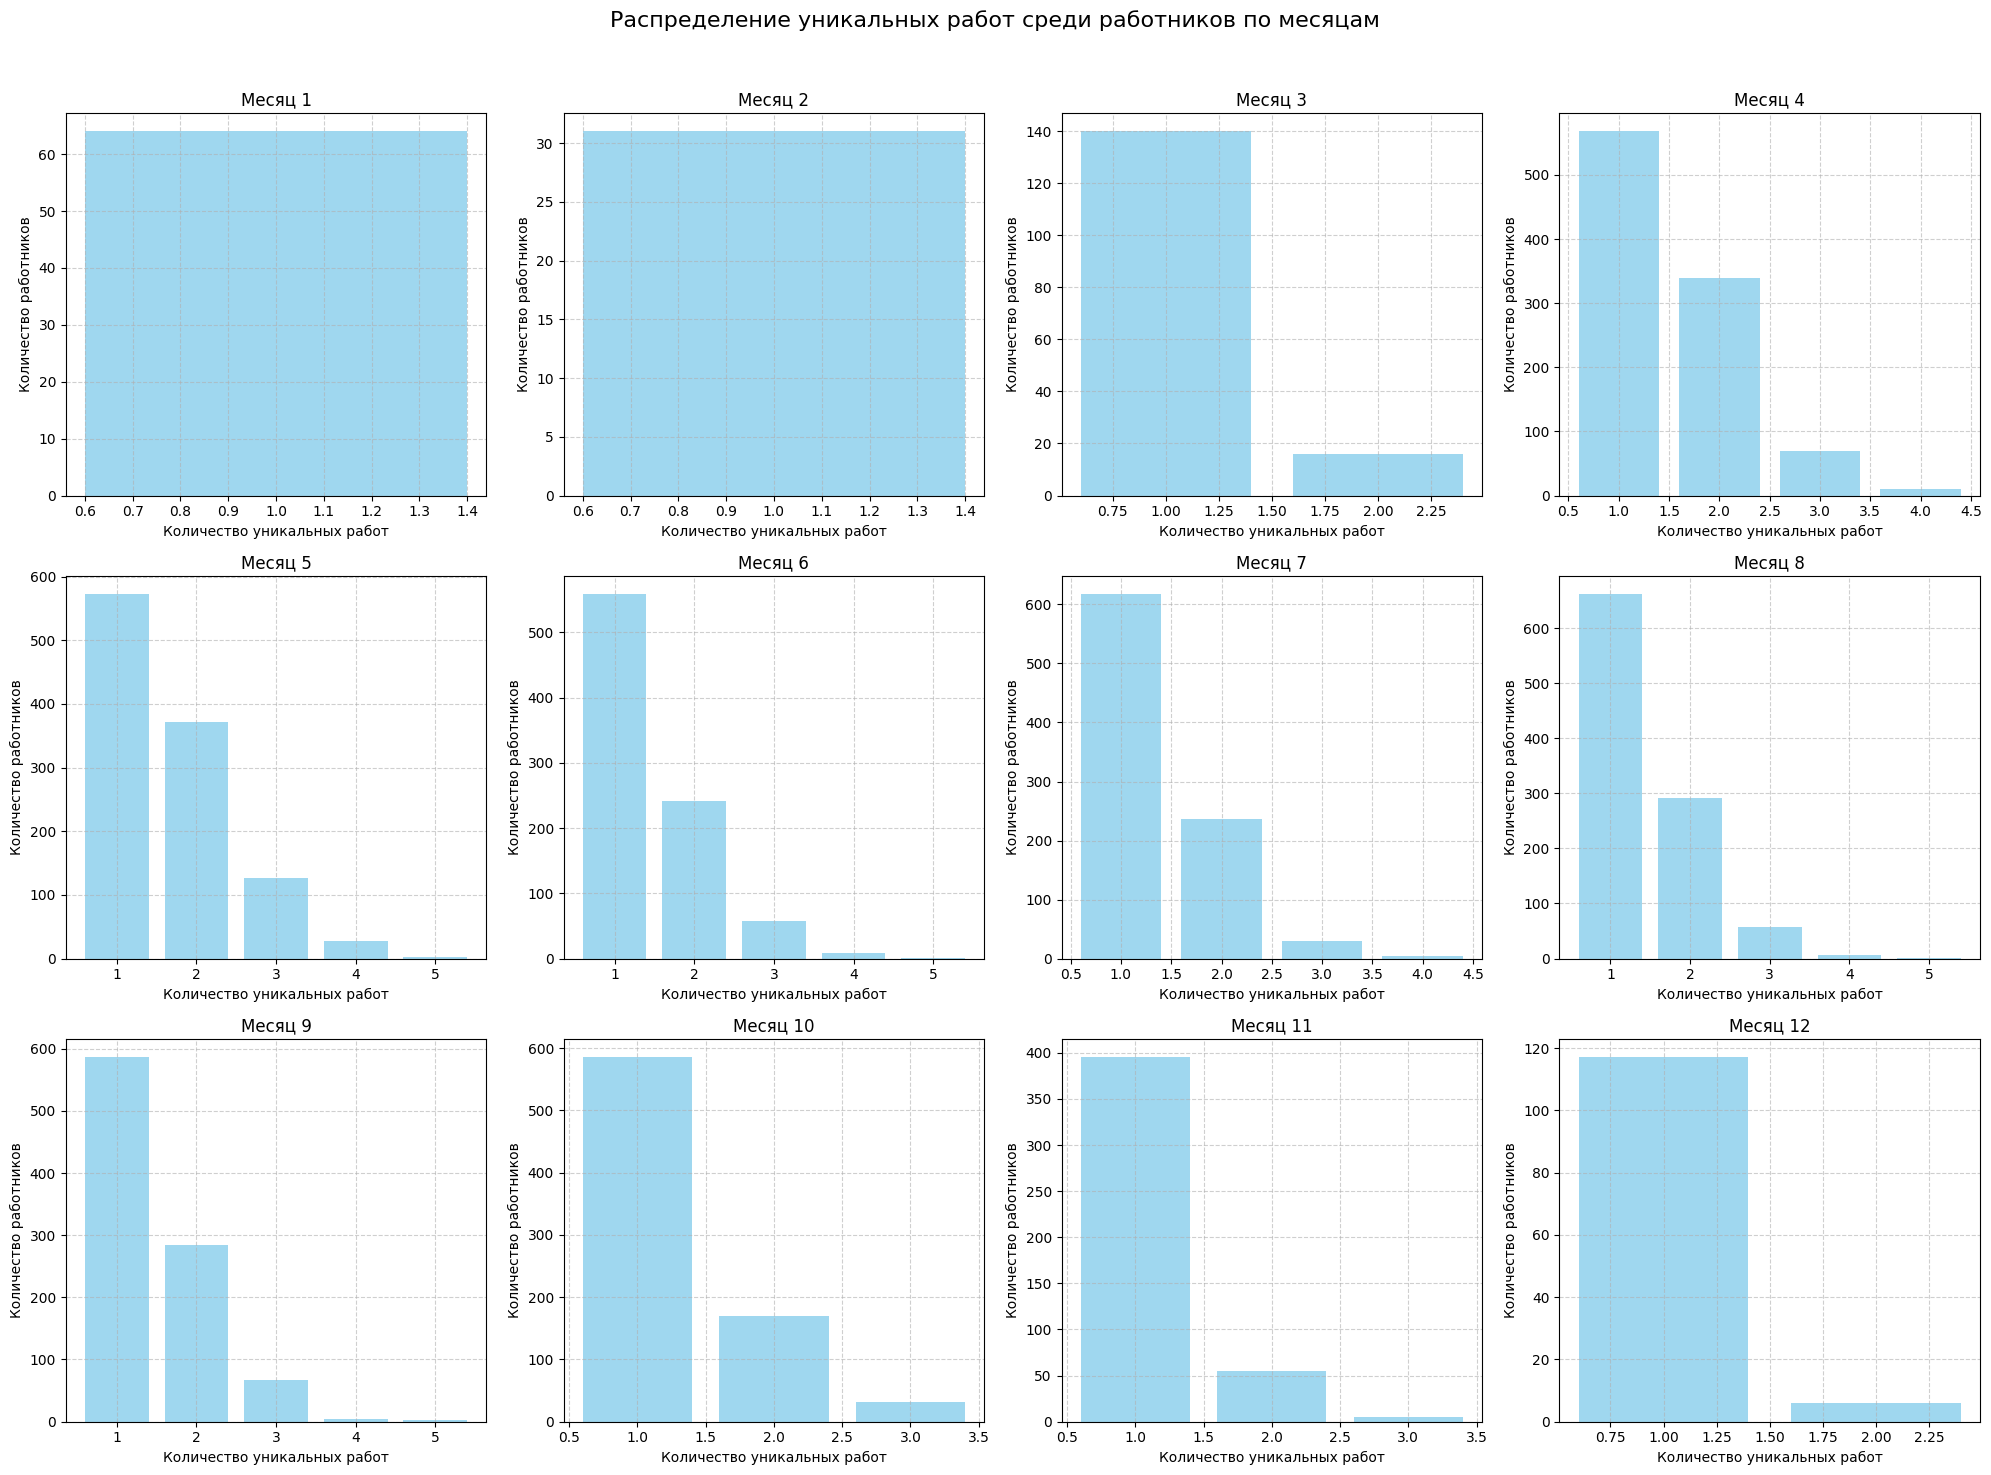

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

works['start_month'] = pd.to_datetime(works['start_date']).dt.month

work_summary = (
    works.groupby(['start_month', 'mech'])['work_type']
    .nunique()
    .reset_index(name='unique_work_types')
)

distribution = (
    work_summary.groupby(['start_month', 'unique_work_types'])
    .size()
    .reset_index(name='worker_count')
)

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for month in range(1, 13):
    ax = axes[month - 1]
    month_data = distribution[distribution['start_month'] == month]
    
    ax.bar(month_data['unique_work_types'], month_data['worker_count'], color='skyblue', alpha=0.8)
    ax.set_title(f'Месяц {month}')
    ax.set_xlabel('Количество уникальных работ')
    ax.set_ylabel('Количество работников')
    ax.grid(True, linestyle='--', alpha=0.6)

for ax in axes[12:]:
    fig.delaxes(ax)

fig.suptitle('Распределение уникальных работ среди работников по месяцам', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('work_subtype_bars.png', dpi=300, bbox_inches='tight')
plt.show()

In [42]:
works_mech = works.groupby('mech')['work_type'].apply(lambda x: ','.join(set(list(x))))
works_mech

mech
Admin MS SQL                                                                    Уборка
Абабков Данил Павлович                                                    Внесение СЗР
Абдулов Руслан Флюрович              Уборка,Обработка почвы,Внесение СЗР,Сев,Внесен...
Абдураззоков Ифтихор Боиржонович             Внесение удобрений,Уборка,Обработка почвы
Абдурахманов Абдурахман Шарипович                                               Уборка
                                                           ...                        
Якушин Иван Владимирович                                                        Уборка
Яланжи Александр Николаевич                                            Обработка почвы
Ямалетдинов Фарид Расыхович                                     Уборка,Обработка почвы
Яныкин Алексей Михайлович                                   Сев,Уборка,Обработка почвы
Яркин Михаил Владимирович                      Сев,Уборка,Внесение СЗР,Обработка почвы
Name: work_type, Length: 1536, dtype: 

In [43]:
amount = {}
for worker in works_mech:
    amount[(worker.count(',') + 1)] = amount.get(worker.count(',') + 1, 0) + 1

In [44]:
amount

{1: 560, 5: 51, 3: 331, 4: 207, 2: 387}

In [45]:
crops = fields[fields['land_type'] == 'пастбище естественное'][['crop', 'crop_predecessor']]

In [46]:
crops['crop'].value_counts()

crop
Пастбище естественное    123
Залежь, кустарник          2
Кукуруза силос             1
Залежь                     1
Name: count, dtype: int64

In [47]:
works.head()

season            field        work_type work_subtype start_date  \
0    2023  16.13.12.044.00  Обработка почвы  Боронование 2022-04-29   
1    2023  16.13.12.017.00  Обработка почвы  Боронование 2022-05-01   
2    2023  16.13.12.012.00  Обработка почвы  Боронование 2022-05-02   
3    2023  16.13.12.012.00  Обработка почвы  Боронование 2022-05-02   
4    2023  16.13.12.017.00  Обработка почвы  Боронование 2022-05-02   

    end_date    area                                          main_tech  \
0 2022-04-30   49.78  Трактор колесный Fendt 936 Vario, гос.ном. 050...   
1 2022-05-02  154.76  Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...   
2 2022-05-03   40.62  Трактор колесный Fendt 936 Vario, гос.ном. 050...   
3 2022-05-03   86.00  Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...   
4 2022-05-03   76.00  Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...   

                                         add_tech  \
0                            Арендованная техника   
1  Борона зубовая Veles АГС-22-2У.М, зав.ном. 789   
2                            Арендованная техника   
3  Борона зубовая Veles АГС-22-2У.М, зав.ном. 789   
4  Борона зубовая Veles АГС-22-2У.М, зав.ном. 789   

                           mech  ...  Unnamed: 13 Unnamed: 14  prod_dry_perc  \
0    Ахметсафин Айрат Рафикович  ...          1.0         0.0            NaN   
1   Ямалетдинов Фарид Расыхович  ...          1.0         0.0            NaN   
2  Мухаметзянов Ринат Айратович  ...          1.0         0.0            NaN   
3        Шакиров Ринат Галиевич  ...          1.0         0.0            NaN   
4        Шакиров Ринат Галиевич  ...          1.0         0.0            NaN   

   prod_humid  prod_impur  yield_fact                               work_id  \
0         NaN         NaN         0.0  A06AD38A-5448-40EC-B095-4B8918B4AC10   
1         NaN         NaN         0.0  62B13DCE-FFB5-4E7A-8F1B-88930BD338EF   
2         NaN         NaN         0.0  D5884A6D-4710-4C0A-8E5A-878291B89846   
3         NaN         NaN         0.0  7A504837-1127-4315-ACF1-171AC80111BF   
4         NaN         NaN         0.0  7FE86DA8-614B-4EBE-85CB-6AF80C08689F   

   start_month  end_month  delta  
0            4        4.0 1 days  
1            5        5.0 1 days  
2            5        5.0 1 days  
3            5        5.0 1 days  
4            5        5.0 1 days  

[5 rows x 23 columns]

In [48]:
works['main_tech'].value_counts()

main_tech
Арендованная техника                                                                                                         10514
Опрыскиватель самоходный John Deere 4940, гос.ном. 8417АВ36, инв.ном. 20130482, зав.ном. 1N4940XPD0023752                     1665
Трактор колесный John Deere 6930, гос.ном. 8420АВ36, инв.ном. 20130510, зав.ном. 1L06930GHCG748541                            1207
Опрыскиватель самоходный Challenger Rogator RG 1100, гос.ном. 6074КЕ46, зав.ном. AGCC1100LCNSL1346                            1205
Трактор колесный Ростсельмаш 2400, зав.ном. R0002400339361                                                                     975
                                                                                                                             ...  
Комбайн зерноуборочный New Holland CS6090, гос.ном. 3359РК62, инв.ном. аф000069, зав.ном. 271560034                              1
Трактор колесный Птз К-746М, гос.ном. 6976РА62, зав.ном. KR0000371, ном.д

In [49]:
works['add_tech'].value_counts()

add_tech
Арендованная техника                                                                                             6088
Жатка зерновая John Deere 625R                                                                                   1617
Разбрасыватель минеральных удобрений Kverneland Exacta TL Geospread, инв.ном. 20170125, зав.ном. VN2420202409    1204
Борона дисковая Lemken Rubin 9/600 KUA, инв.ном. ЮР62340, зав.ном. 456482                                         715
Опрыскиватель прицепной навесной Amazone UX 5200, зав.ном. UX60000149                                             675
                                                                                                                 ... 
Жатка соевая универсальная Ростсельмаш Float Stream 902, зав.ном. MOFS0902000952                                    1
Прицеп тракторный Fliegl ASW 381 Gigant/Tridem, гос.ном. 4242КВ40, зав.ном. WGJ113304KM401468                       1
Погрузчик фронтальный навесной Ярославич ПНБ-12

In [50]:
pd.set_option('display.max_rows', 1000)

In [51]:
works[works['add_tech'] == "Арендованная техника"]['main_tech'].value_counts()

main_tech
Арендованная техника                                                                                                                3860
Трактор колесный Massey Ferguson 8737, гос.ном. 9483АР22, зав.ном. VKKMY48GELB030004                                                 132
Трактор колесный Мтз 82.1, инв.ном. ЮР76092, зав.ном. Y4R900Z01L1102307, ном.двиг. 092335                                             84
Трактор колесный Птз К-525, гос.ном. 6091АР22, инв.ном. ЮС41006, зав.ном. 022C4124                                                    80
Трактор колесный John Deere 6130D, гос.ном. 9332НВ56, зав.ном. 1JZ6130DLCE001113                                                      74
Трактор колесный Ростсельмаш 2400, гос.ном. 6109МК22, зав.ном. R0002400339417, ном.двиг. 35366715                                     73
Трактор колесный Ростсельмаш 2375, гос.ном. 8929НХ77, зав.ном. R0002375338339, ном.двиг. 35356724                                     67
Трактор колесный Massey Ferguso

In [52]:
works.head()

season            field        work_type work_subtype start_date  \
0    2023  16.13.12.044.00  Обработка почвы  Боронование 2022-04-29   
1    2023  16.13.12.017.00  Обработка почвы  Боронование 2022-05-01   
2    2023  16.13.12.012.00  Обработка почвы  Боронование 2022-05-02   
3    2023  16.13.12.012.00  Обработка почвы  Боронование 2022-05-02   
4    2023  16.13.12.017.00  Обработка почвы  Боронование 2022-05-02   

    end_date    area                                          main_tech  \
0 2022-04-30   49.78  Трактор колесный Fendt 936 Vario, гос.ном. 050...   
1 2022-05-02  154.76  Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...   
2 2022-05-03   40.62  Трактор колесный Fendt 936 Vario, гос.ном. 050...   
3 2022-05-03   86.00  Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...   
4 2022-05-03   76.00  Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...   

                                         add_tech  \
0                            Арендованная техника   
1  Борона зубовая Veles АГС-22-2У.М, зав.ном. 789   
2                            Арендованная техника   
3  Борона зубовая Veles АГС-22-2У.М, зав.ном. 789   
4  Борона зубовая Veles АГС-22-2У.М, зав.ном. 789   

                           mech  ...  Unnamed: 13 Unnamed: 14  prod_dry_perc  \
0    Ахметсафин Айрат Рафикович  ...          1.0         0.0            NaN   
1   Ямалетдинов Фарид Расыхович  ...          1.0         0.0            NaN   
2  Мухаметзянов Ринат Айратович  ...          1.0         0.0            NaN   
3        Шакиров Ринат Галиевич  ...          1.0         0.0            NaN   
4        Шакиров Ринат Галиевич  ...          1.0         0.0            NaN   

   prod_humid  prod_impur  yield_fact                               work_id  \
0         NaN         NaN         0.0  A06AD38A-5448-40EC-B095-4B8918B4AC10   
1         NaN         NaN         0.0  62B13DCE-FFB5-4E7A-8F1B-88930BD338EF   
2         NaN         NaN         0.0  D5884A6D-4710-4C0A-8E5A-878291B89846   
3         NaN         NaN         0.0  7A504837-1127-4315-ACF1-171AC80111BF   
4         NaN         NaN         0.0  7FE86DA8-614B-4EBE-85CB-6AF80C08689F   

   start_month  end_month  delta  
0            4        4.0 1 days  
1            5        5.0 1 days  
2            5        5.0 1 days  
3            5        5.0 1 days  
4            5        5.0 1 days  

[5 rows x 23 columns]

In [53]:
import pandas as pd

value = pd.read_csv('ekoniva-dataset/value.csv', encoding='utf-8')


In [54]:
value.head()

field inv_item_type inv_item_name inv_item_weight inv_item_unit  \
0  36.01.21.025.01     Удобрения  Удобрение 31        15017,60            кг   
1  36.14.12.064.00     Удобрения  Удобрение 31         6500,00            м3   
2  36.14.16.008.00     Удобрения  Удобрение 49         7865,00             т   
3  36.14.16.008.00     Удобрения  Удобрение 49        10985,00             т   
4  36.14.16.008.00     Удобрения  Удобрение 49        10985,00             т   

  inv_item_dose inv_item_date                               work_id  
0        260,00    28.10.2024  E3A7DAEB-D124-4685-ADE1-199818C77361  
1         65,00    28.10.2024  0AB8C8D7-04BD-4483-98B2-3E062CDD7E3E  
2         65,00    28.10.2024  00E51F81-0A4F-4983-B068-877A089FFD33  
3         65,00    28.10.2024  150F0150-8061-4CE9-9570-B112CBAD7C51  
4         65,00    28.10.2024  D5D1EADB-D159-4CF8-8C2A-171517ACD403

In [55]:
value['inv_item_type'].value_counts()

inv_item_type
СЗР          100115
Удобрения     43008
Семена        27690
Name: count, dtype: int64

In [56]:
pd.set_option('display.max_rows', 1500)

In [57]:
value[value['inv_item_type'] == 'Семена']['inv_item_name'].value_counts()

inv_item_name
Семена Пшеницы яровой мягкой Ликамеро РС-1                                   669
Семена Пшеницы яровой мягкой Ликамеро ЭС                                     522
Семена Пшеницы озимой Скипетр РС-1                                           404
Семена кукурузы РЖТ Галифакс F1 2023                                         373
Гибрид Кукурузы Росс 140 СВ ФАО 150                                          333
Гибрид Кукурузы Росс 140 СВ +  ФАО 150                                       289
Гибрид Кукурузы Каскад 166 + ФАО 170                                         284
Семена Пшеницы яровой мягкой Ликамеро РС-2                                   261
Семена кукурузы Талисман СИ F1 2022                                          232
Семена Ячменя ярового Маргрет РС-1                                           222
Семена Пшеницы озимой Скипетр ЭС                                             212
Гибрид Кукурузы Каскад 166 ФАО 170                                           198
Семена Гороха 

In [58]:
value[value['inv_item_type'] == 'Удобрения']['inv_item_name'].value_counts()

inv_item_name
Удобрение 57    10275
Удобрение 10     7440
Удобрение 49     4600
Удобрение 38     4308
Удобрение 15     3188
Удобрение 31     1898
Удобрение 28     1442
Удобрение 5      1295
Удобрение 13      766
Удобрение 14      740
Удобрение 24      679
Удобрение 12      657
Удобрение 45      594
Удобрение 56      511
Удобрение 44      491
Удобрение 23      449
Удобрение 6       331
Удобрение 16      276
Удобрение 17      247
Удобрение 19      242
Удобрение 36      240
Удобрение 18      231
Удобрение 33      207
Удобрение 26      201
Удобрение 40      177
Удобрение 63      156
Удобрение 37      139
Удобрение 34      134
Удобрение 32      133
Удобрение 53      122
Удобрение 9       117
Удобрение 7       108
Удобрение 68       75
Удобрение 4        73
Удобрение 1        70
Удобрение 64       49
Удобрение 50       48
Удобрение 35       40
Удобрение 58       28
Удобрение 39       27
Удобрение 70       27
Удобрение 67       23
Удобрение 65       21
Удобрение 30       18
Удобрение 59      

In [59]:
value[value['inv_item_type'] == 'СЗР']['inv_item_name'].value_counts()

inv_item_name
Препарат 271    7470
Препарат 280    3064
Препарат 98     2880
Препарат 459    2710
Препарат 487    2648
Препарат 146    2471
Препарат 376    2354
Препарат 481    2300
Препарат 139    2014
Препарат 401    1953
Препарат 264    1716
Препарат 274    1655
Препарат 23     1602
Препарат 289    1592
Препарат 216    1473
Препарат 157    1360
Препарат 357    1228
Препарат 17     1190
Препарат 127    1168
Препарат 302    1142
Препарат 375    1134
Препарат 293    1080
Препарат 268    1058
Препарат 402    1040
Препарат 36     1000
Препарат 240     957
Препарат 196     933
Препарат 97      929
Препарат 38      894
Препарат 384     854
Препарат 460     853
Препарат 420     819
Препарат 51      743
Препарат 270     718
Препарат 144     705
Препарат 172     690
Препарат 52      688
Препарат 333     662
Препарат 448     662
Препарат 237     661
Препарат 102     655
Препарат 469     642
Препарат 285     621
Препарат 346     619
Препарат 126     594
Препарат 261     594
Препарат 34      569

In [60]:
6204 / 8 / 30

25.85

In [61]:
works['prod_purpose'].value_counts()

prod_purpose
товарная    13695
семена       6302
сенаж        5866
силос        4771
зерно        1277
солома       1004
сено          495
карнаж        451
Name: count, dtype: int64

In [62]:
works['prod_purpose'].isna().sum()

np.int64(140822)

In [63]:
works[works['prod_purpose'].notna()]['work_type'].value_counts()

work_type
Уборка             33853
Обработка почвы        8
Name: count, dtype: int64

In [64]:
works[works['work_type'] == 'Уборка'].isna().sum()

season               0
field                0
work_type            0
work_subtype         0
start_date           0
end_date          2763
area                 0
main_tech            0
add_tech         25843
mech                 0
proc_depth       59097
prod_purpose     25244
prod_weight          0
Unnamed: 13       2903
Unnamed: 14       2903
prod_dry_perc    46136
prod_humid       35543
prod_impur       35543
yield_fact           0
work_id              0
start_month          0
end_month         2763
delta             2763
dtype: int64

In [65]:
fields[fields['field'] == '50.33.05.016.00']

field  region land_type  fertility_score  season  \
5324   50.33.05.016.00  Москва     пашня              4.0    2023   
13397  50.33.05.016.00  Москва     пашня              4.0    2024   

                    crop   crop_predecessor  crop_yearold    area  \
5324   Оз.пшеница мягкая  Яр.пшеница мягкая           NaN  121.77   
13397  Оз.пшеница мягкая  Оз.пшеница мягкая           NaN  121.77   

              hybrid reproduction seed_origin technology  yield_plan   p2o5  \
5324   Московская 40         РС-1         NaN        NaN        4.46  132.0   
13397  Московская 40          РСт         NaN        NaN        4.60  132.0   

         k2o  humus   ph  
5324   132.0    1.6  5.3  
13397  132.0    1.6  5.3

In [66]:
import seaborn as sns

In [68]:
fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16060 entries, 0 to 16059
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   field             16060 non-null  object 
 1   region            16060 non-null  object 
 2   land_type         16060 non-null  object 
 3   fertility_score   15267 non-null  float64
 4   season            16060 non-null  int64  
 5   crop              16060 non-null  object 
 6   crop_predecessor  15718 non-null  object 
 7   crop_yearold      2678 non-null   float64
 8   area              16060 non-null  float64
 9   hybrid            8679 non-null   object 
 10  reproduction      8194 non-null   object 
 11  seed_origin       8468 non-null   object 
 12  technology        8766 non-null   object 
 13  yield_plan        10855 non-null  float64
 14  p2o5              10310 non-null  float64
 15  k2o               10317 non-null  float64
 16  humus             10272 non-null  float6

In [69]:
# columns_to_convert = [
#     'area', 'yield_plan', 'p2o5', 'k2o', 'humus', 'ph', 
# ]

# for column in columns_to_convert:
#     if column in fields.columns:
#         fields[column] = fields[column].str.replace(',', '.').apply(pd.to_numeric, errors='coerce')

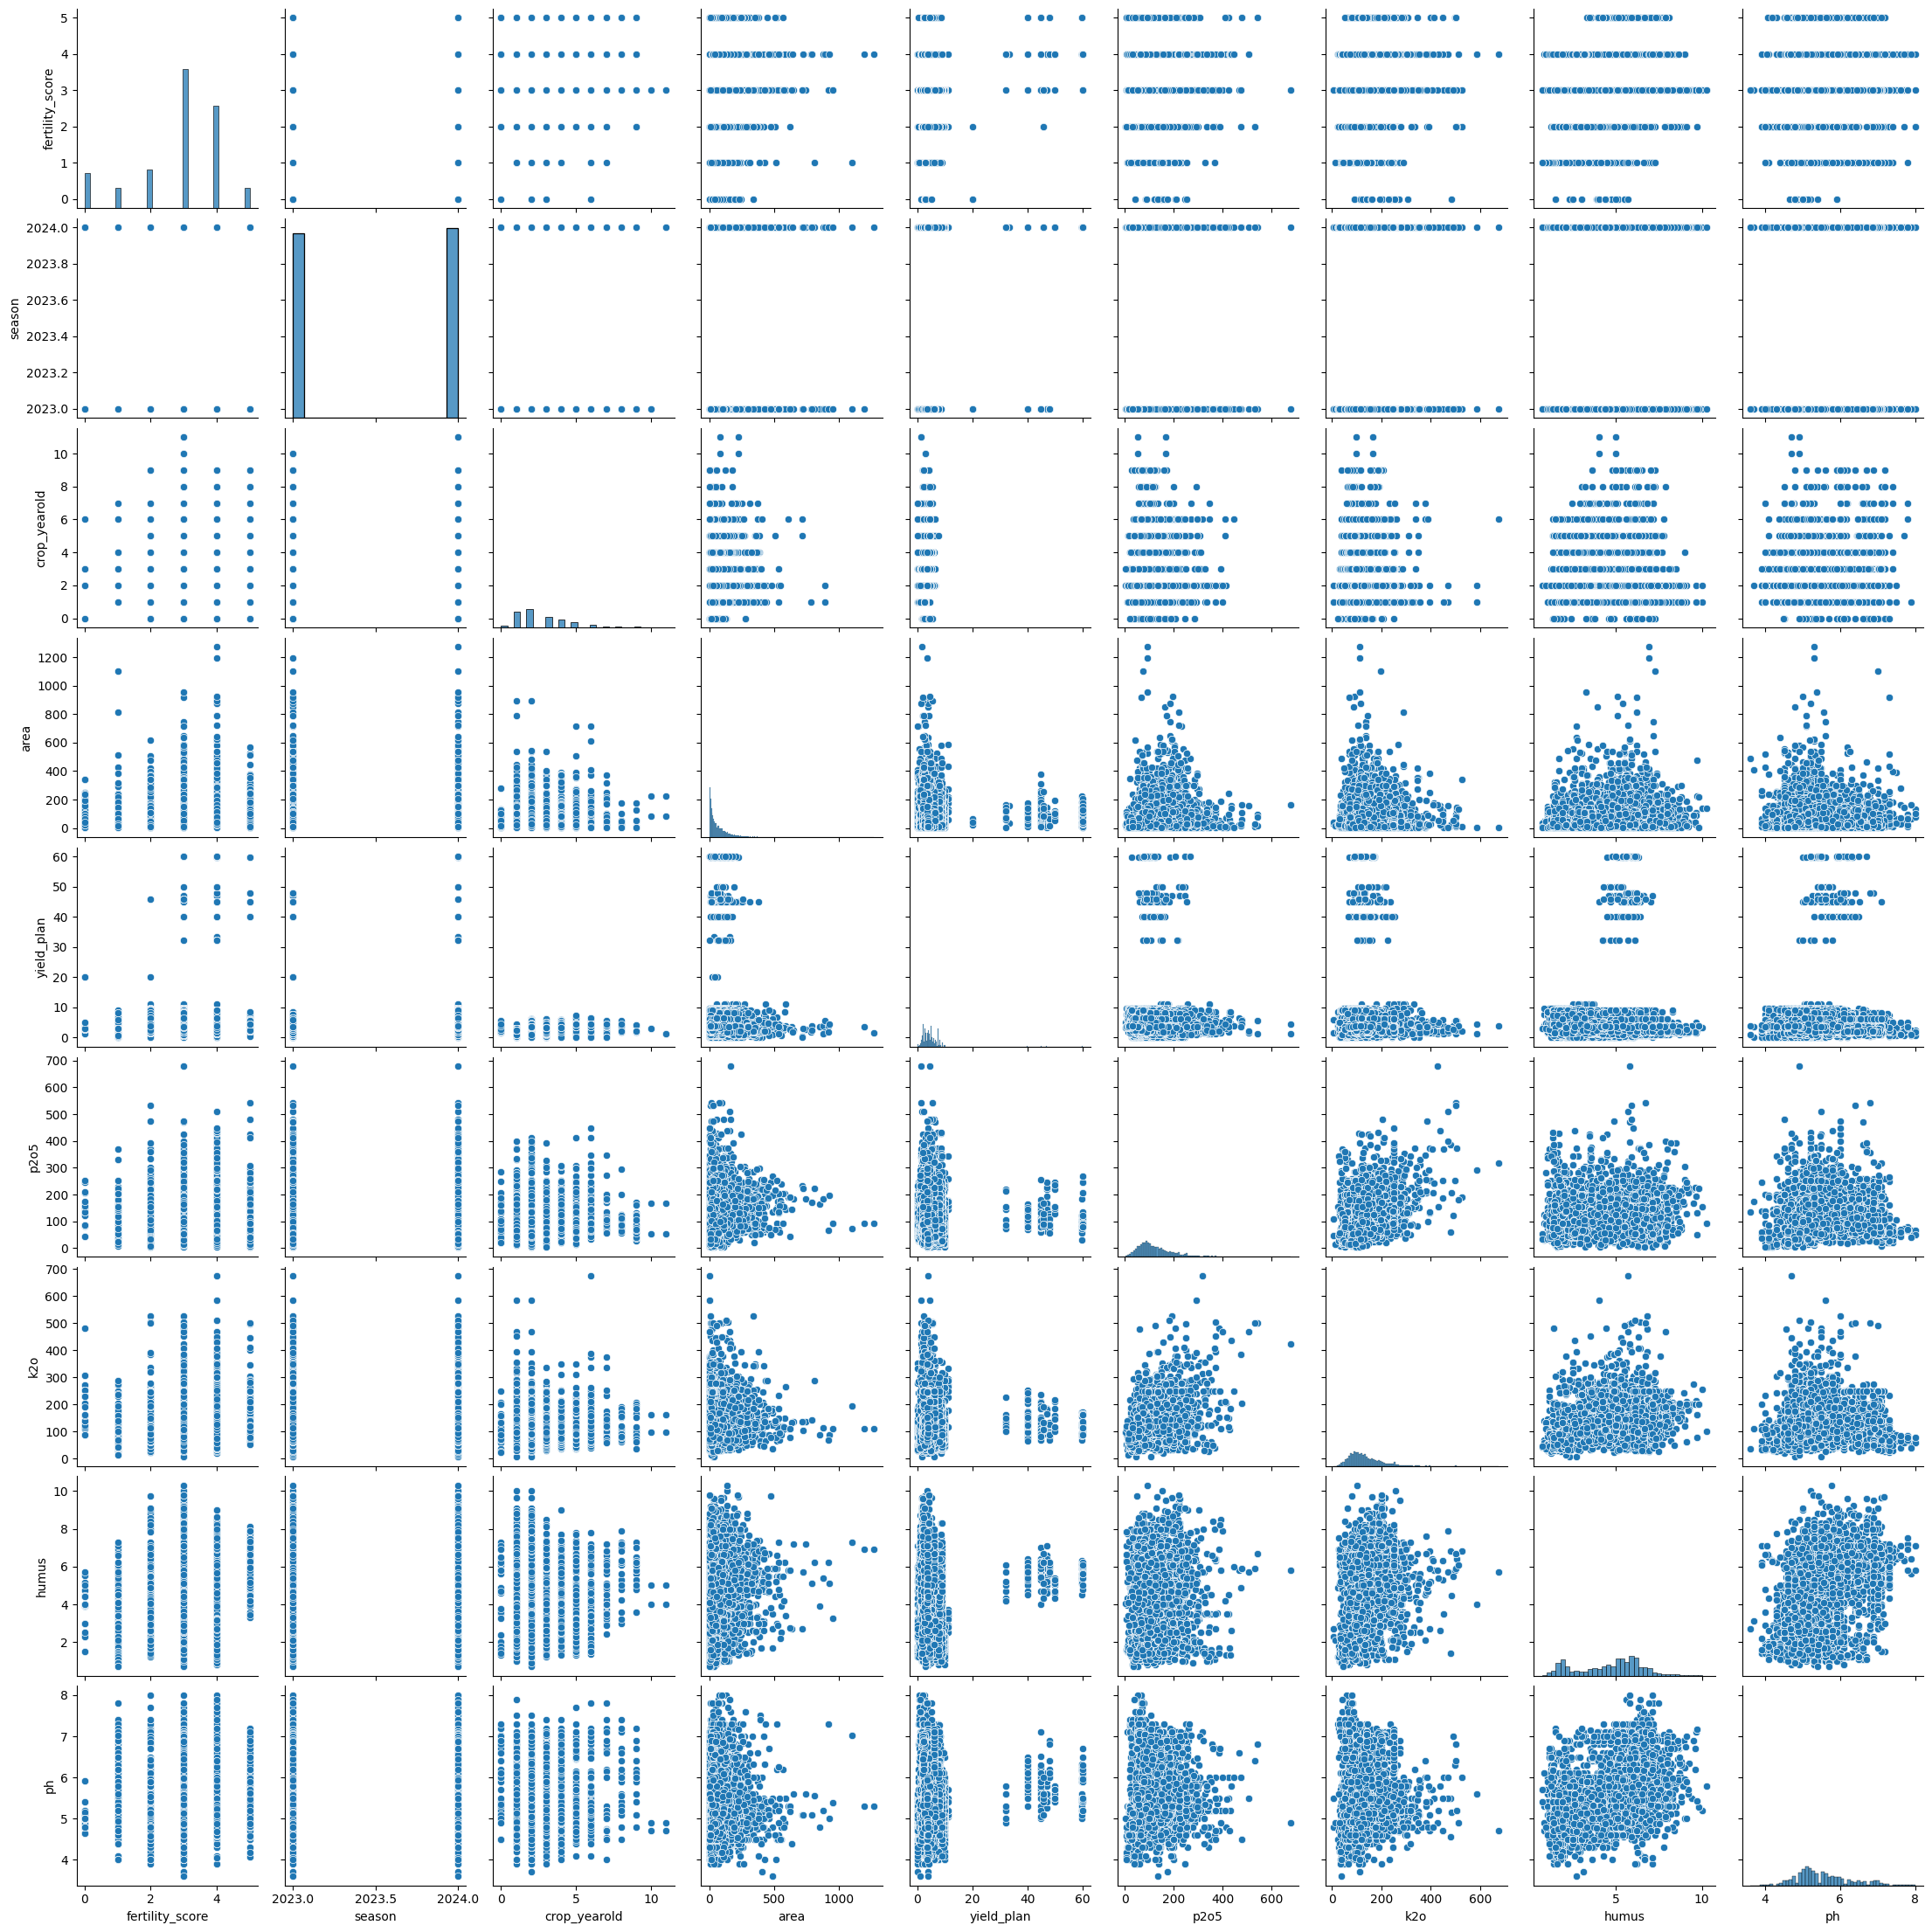

In [70]:
numeric_columns = fields.select_dtypes(include=['number']).columns

sns.pairplot(fields[numeric_columns])
plt.show()

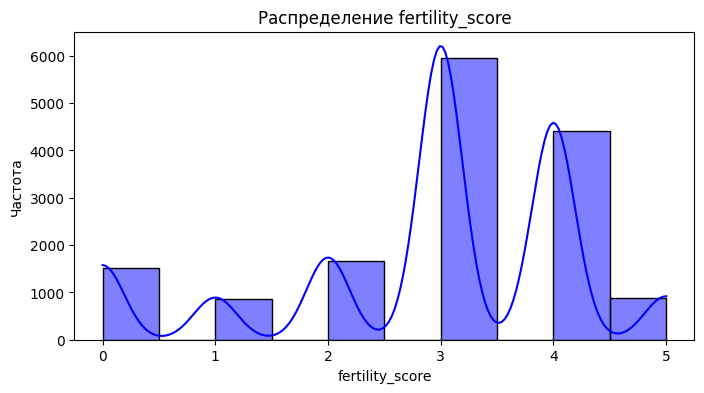

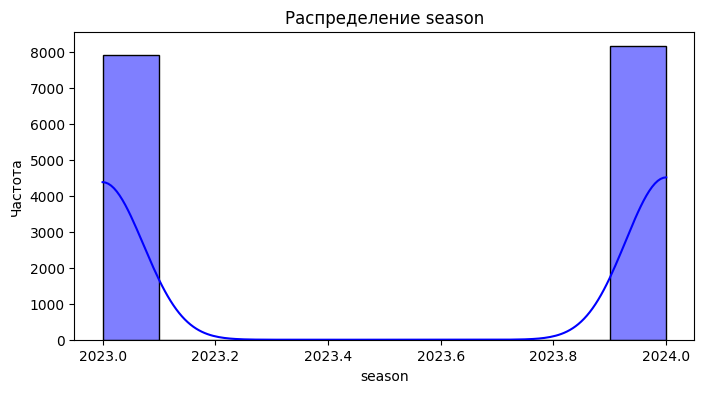

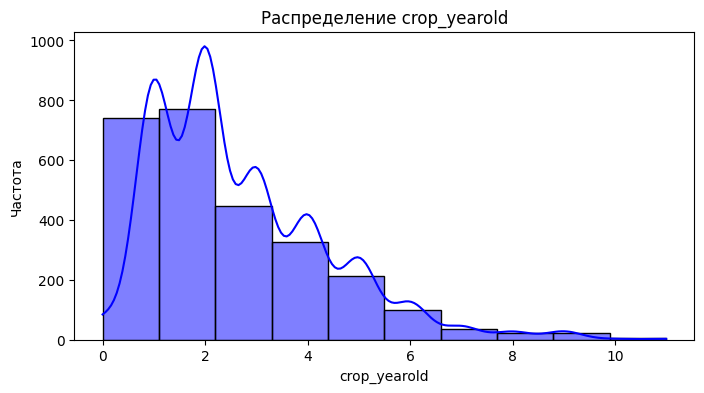

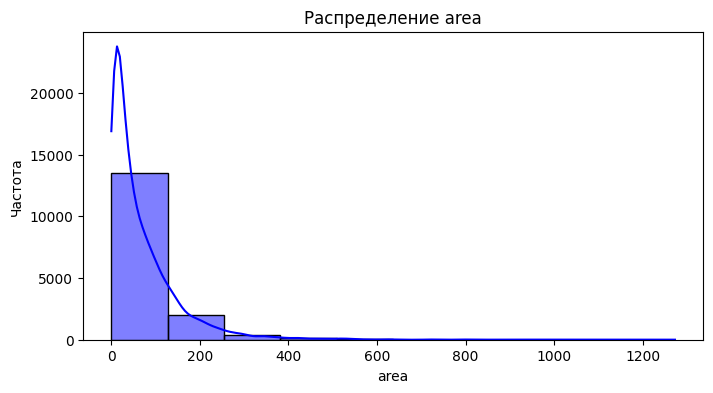

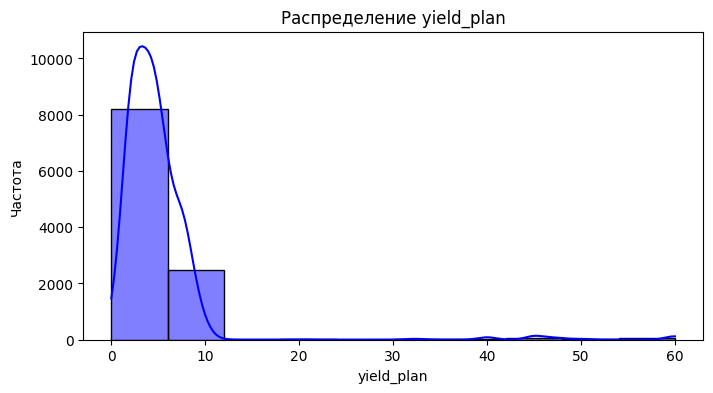

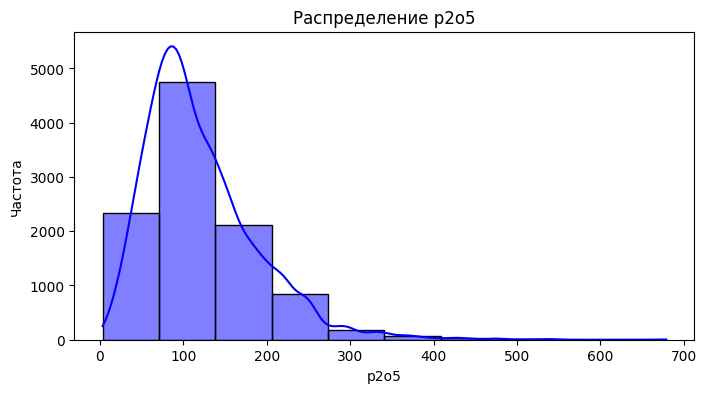

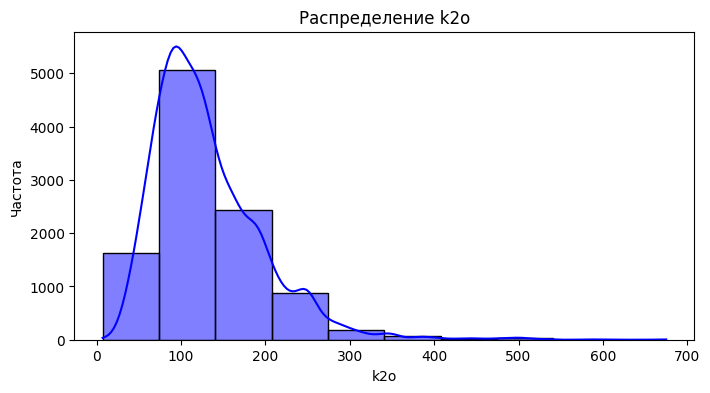

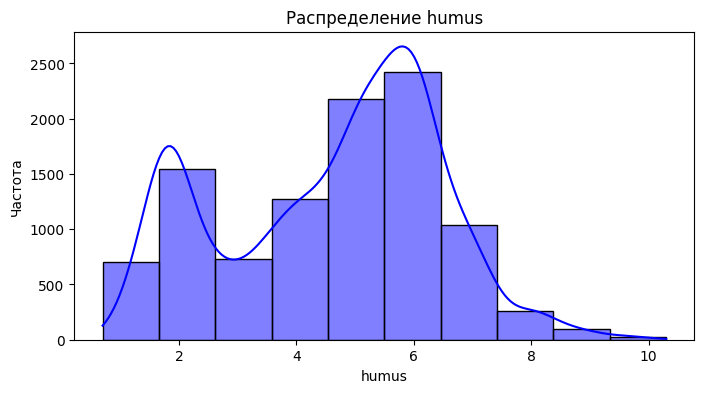

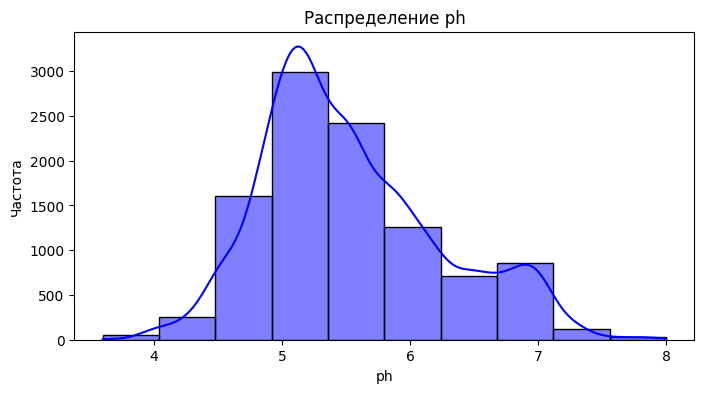

In [71]:
numeric_columns = fields.select_dtypes(include=['number']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(fields[column], kde=True, color='blue', bins=10)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.show()

In [72]:
import pandas as pd
df = pd.read_csv('merged-dataset.csv')

/var/folders/pn/0bn7dksx05d8k5q8rpx3vxm80000gn/T/ipykernel_48925/3456697456.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('merged-dataset.csv')


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228636 entries, 0 to 228635
Data columns (total 43 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           228636 non-null  int64  
 1   season               228636 non-null  int64  
 2   field                228636 non-null  object 
 3   work_type            228636 non-null  object 
 4   work_subtype         228636 non-null  object 
 5   start_date           228636 non-null  object 
 6   end_date             217100 non-null  object 
 7   completed_work_area  228636 non-null  float64
 8   main_tech            228636 non-null  object 
 9   add_tech             150610 non-null  object 
 10  mech                 228636 non-null  object 
 11  proc_depth           42139 non-null   float64
 12  prod_purpose         33861 non-null   object 
 13  prod_weight          228636 non-null  float64
 14  Unnamed: 13          215236 non-null  float64
 15  Unnamed: 14      

In [75]:
# columns_to_convert = [
#     'yield_fact', 'completed_work_area', 
#     'field_area', 'yield_plan', 'p2o5', 'k2o', 'humus', 'ph', 
#     'inv_item_weight', 'inv_item_dose', 'proc_depth', 'prod_purpose', 
#     'prod_weight', 'prod_dry_perc', 'prod_humid', 'prod_impur'
# ]

# for column in columns_to_convert:
#     if column in df.columns:
#         df[column] = df[column].str.replace(',', '.').apply(pd.to_numeric, errors='coerce')

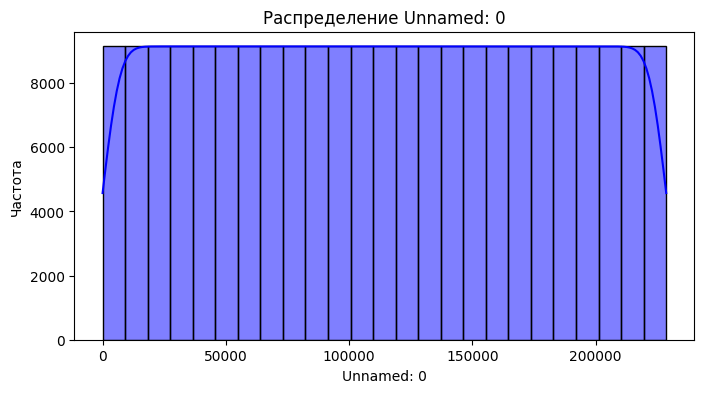

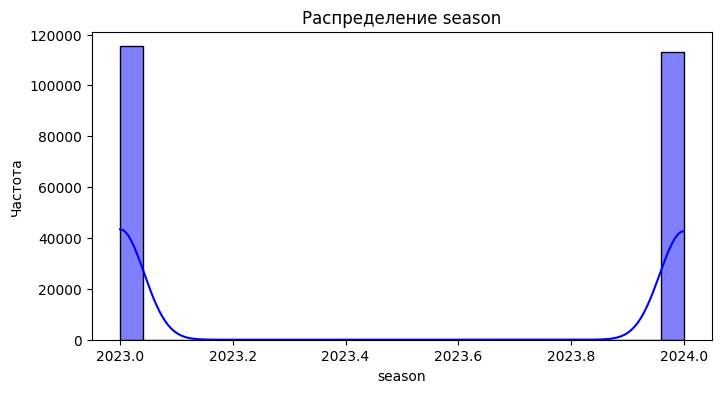

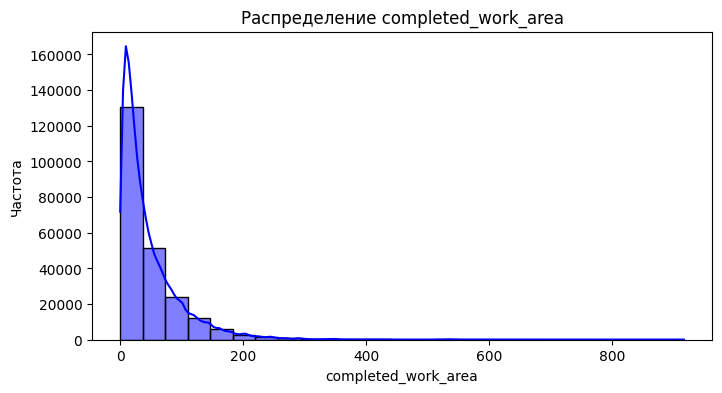

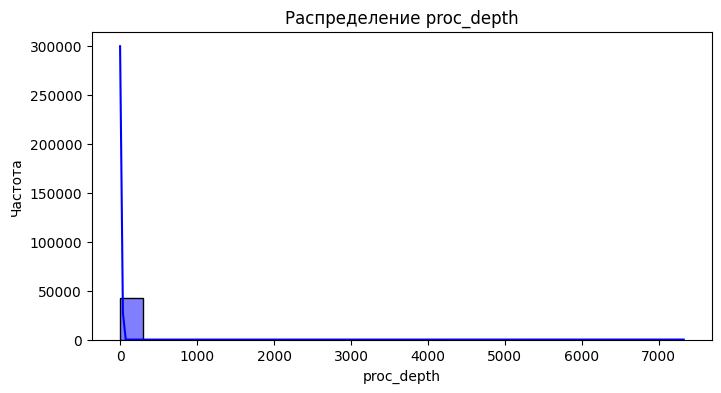

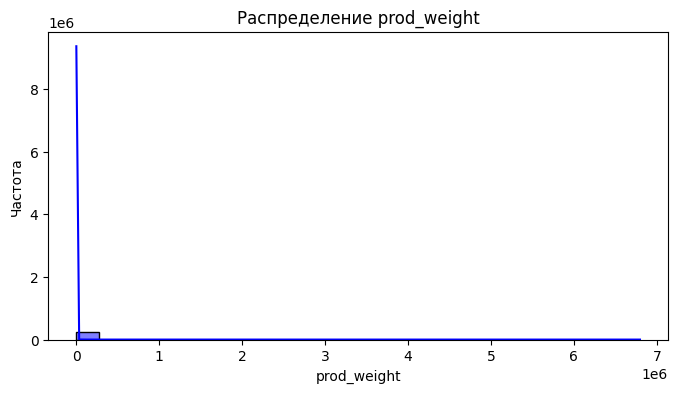

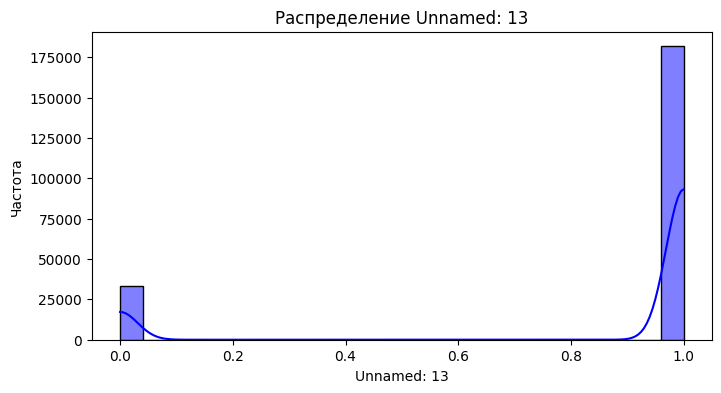

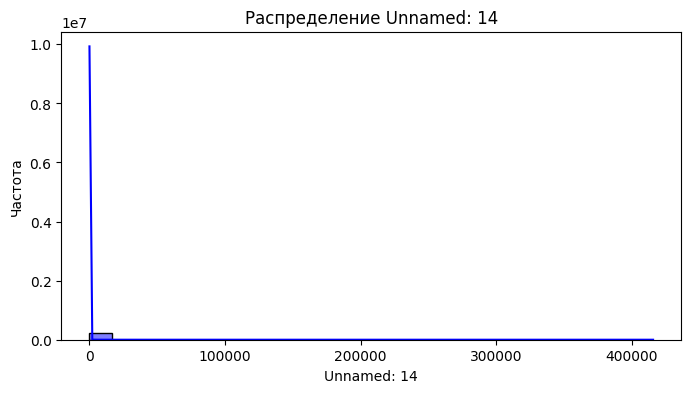

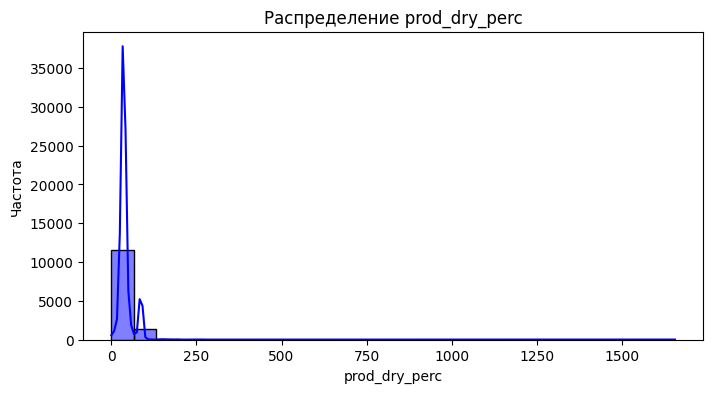

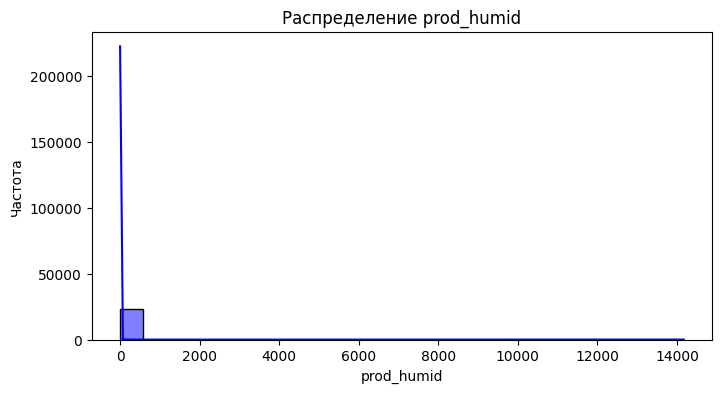

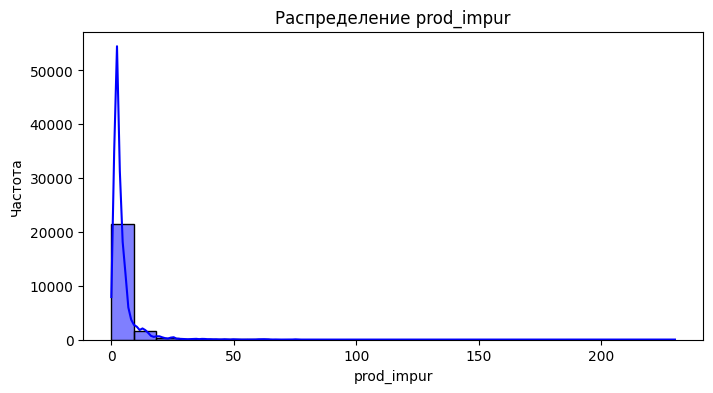

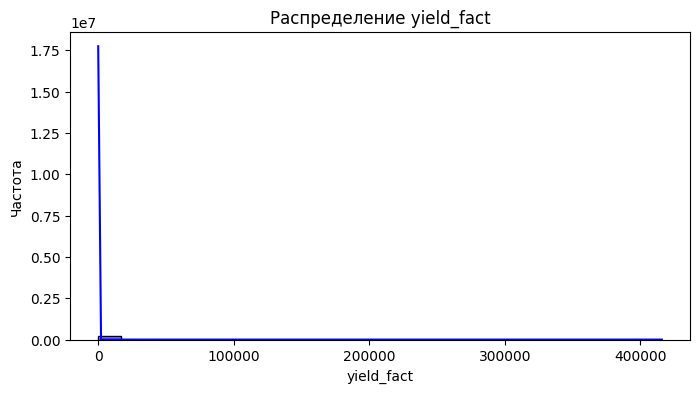

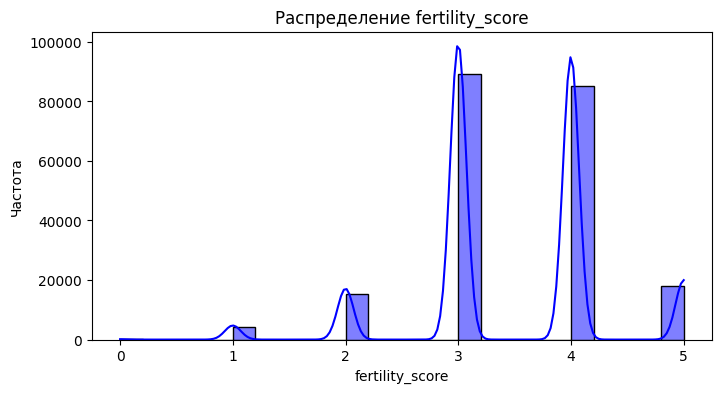

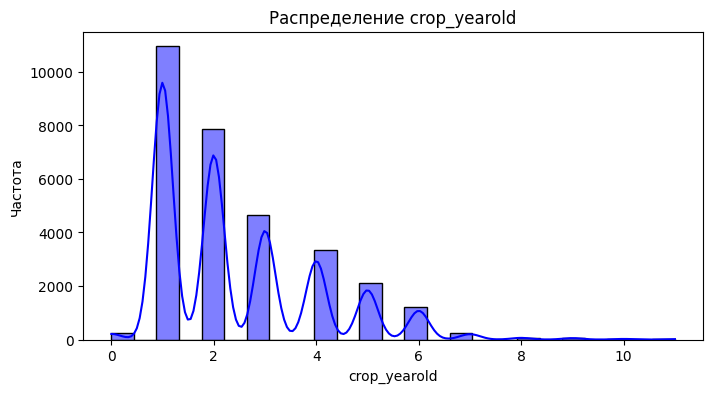

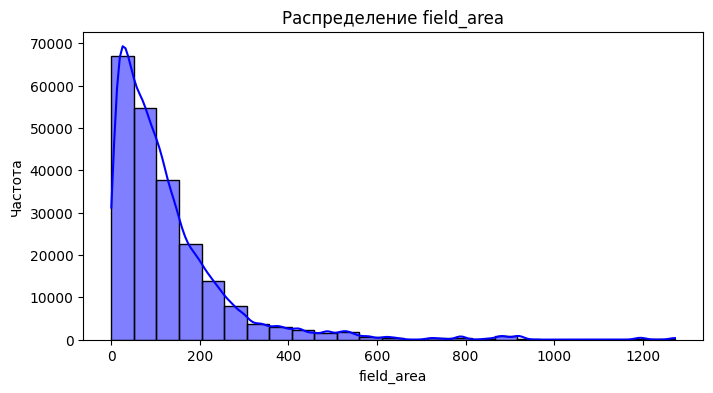

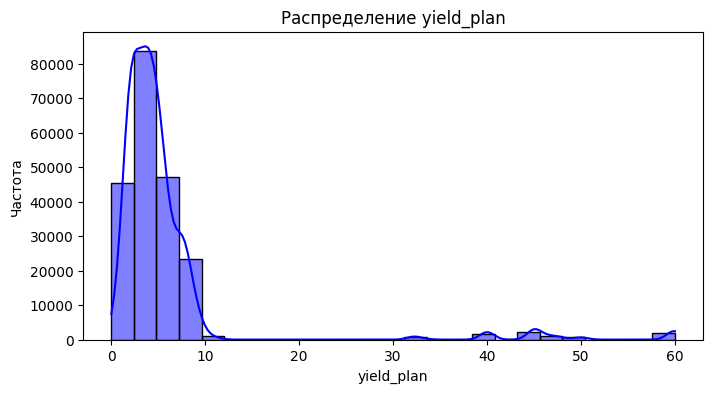

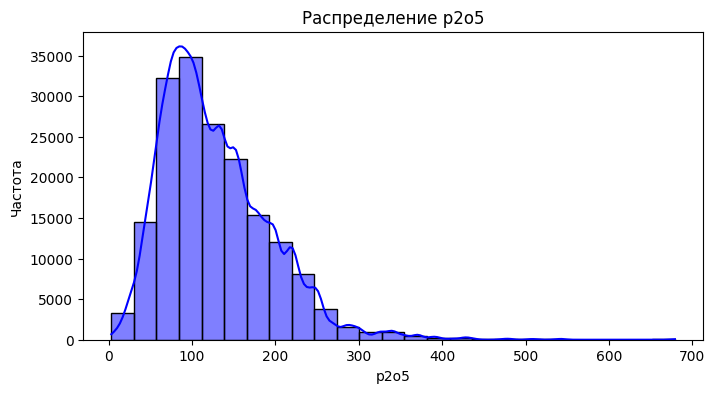

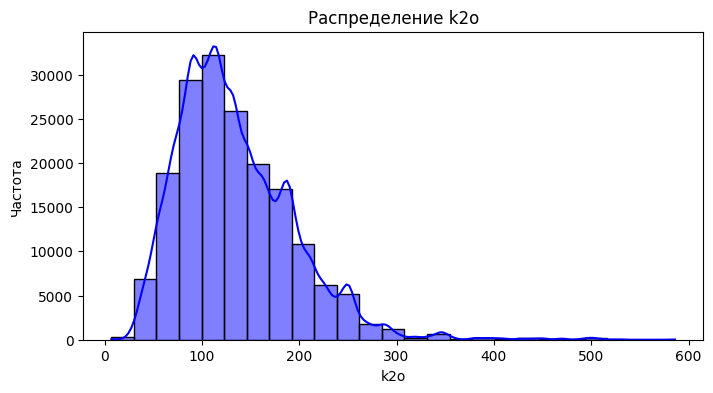

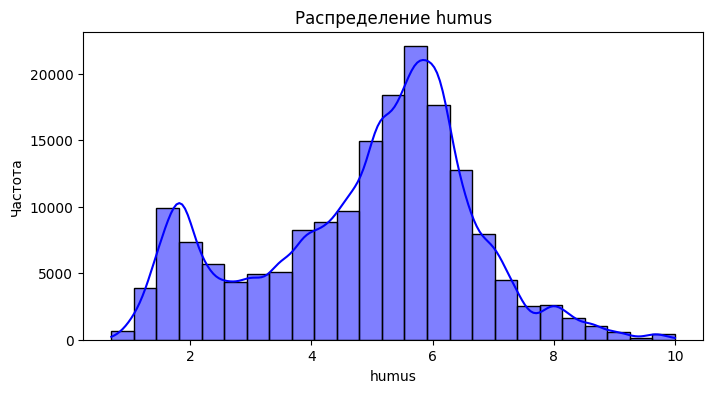

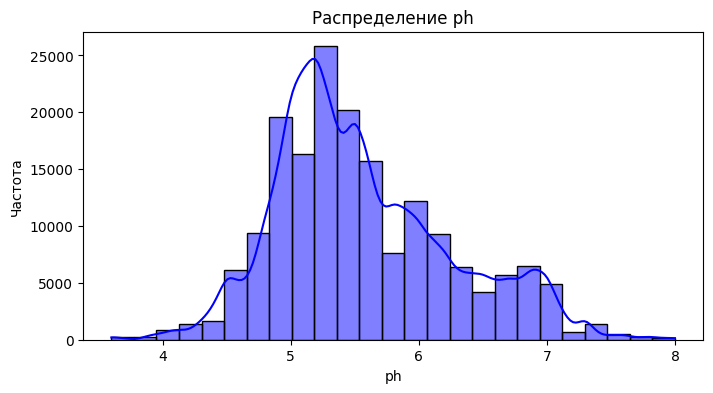

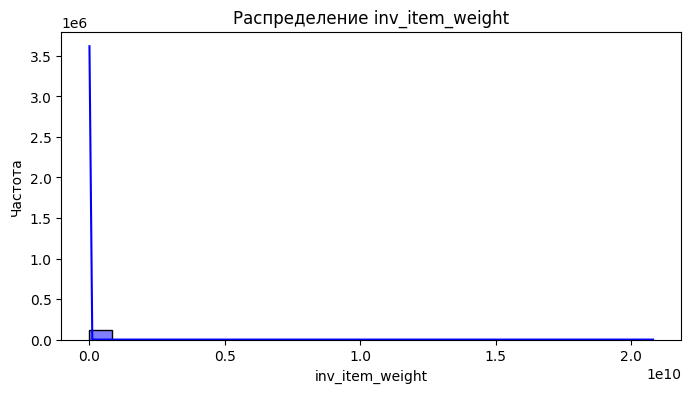

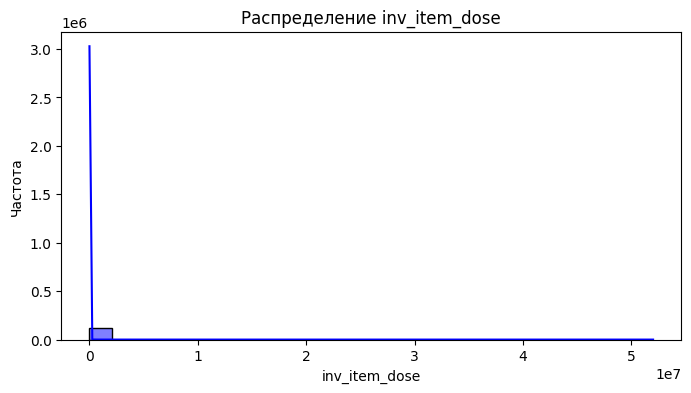

In [76]:
numeric_columns = df.select_dtypes(include=['number']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, color='blue', bins=25)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.show()

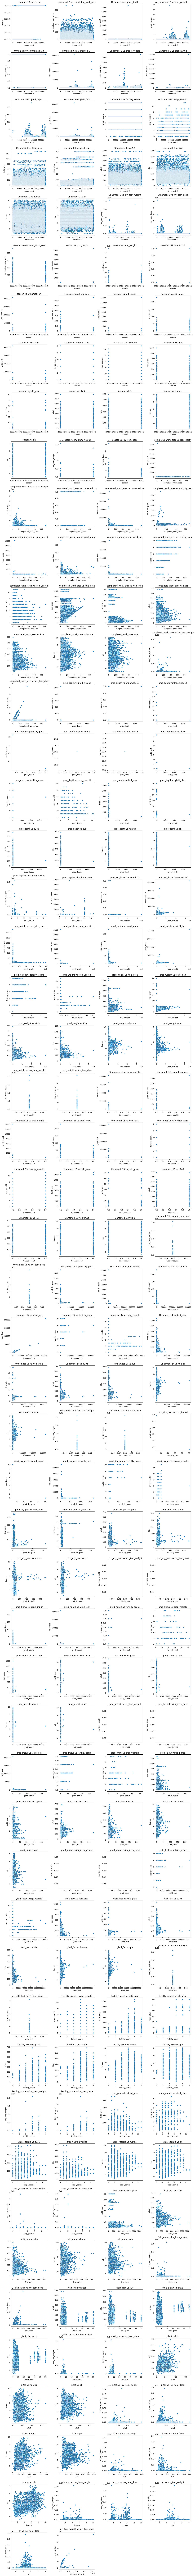

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

numeric_columns = df.select_dtypes(include=['number']).columns

pairs = list(itertools.combinations(numeric_columns, 2))

n_cols = 4
n_rows = int(np.ceil(len(pairs) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))

axes = axes.flatten()
for i, (col1, col2) in enumerate(pairs):
    ax = axes[i]
    sns.scatterplot(x=df[col1], y=df[col2], ax=ax)
    ax.set_title(f'{col1} vs {col2}')
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)

for i in range(len(pairs), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

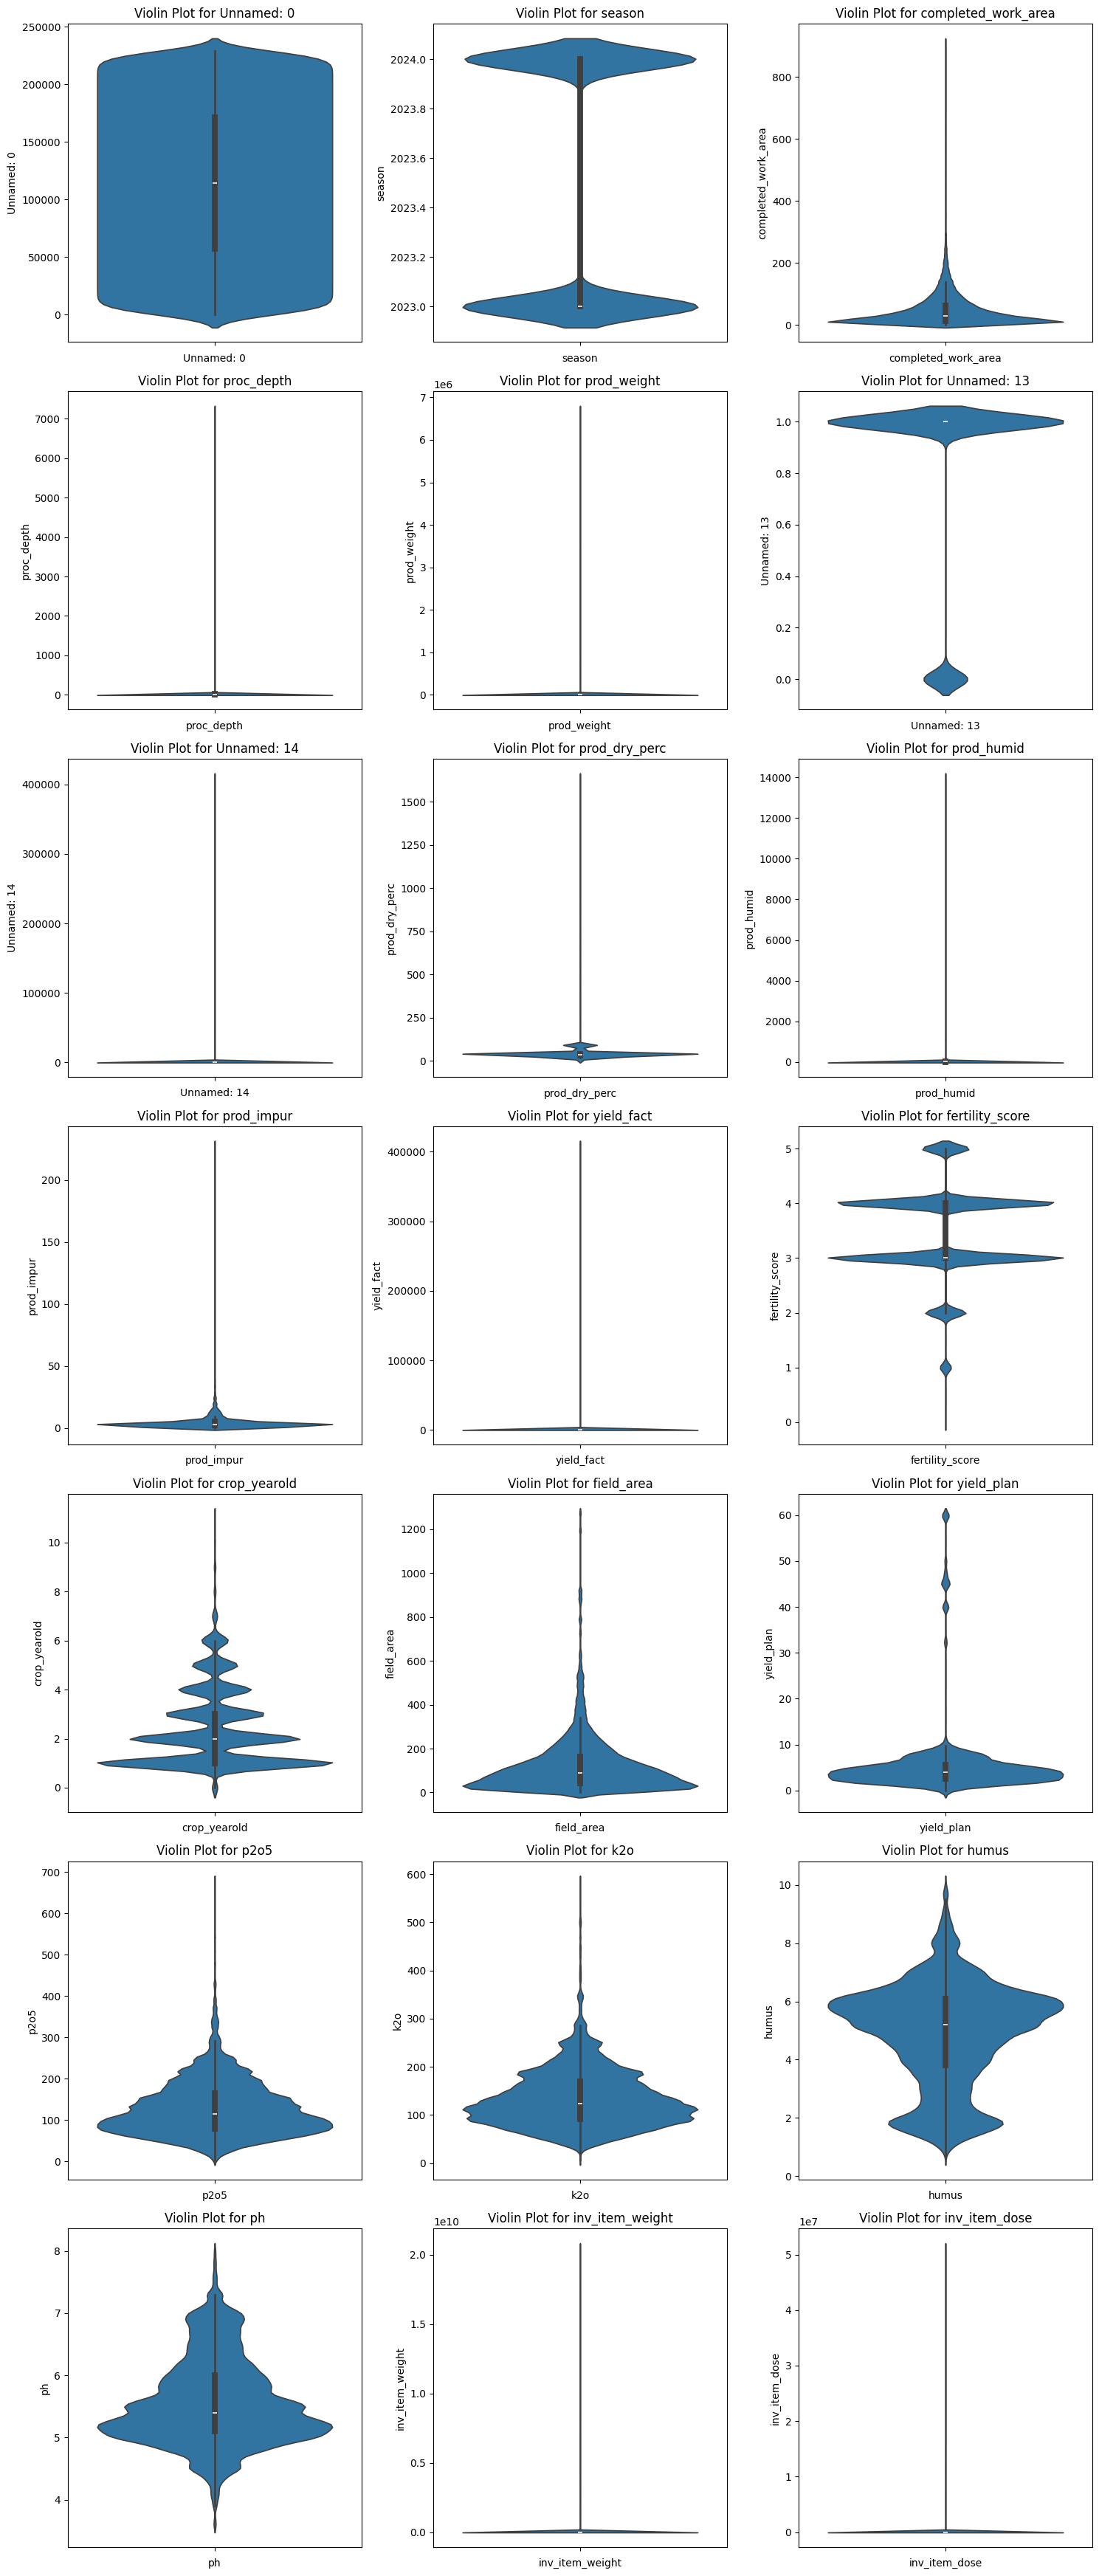

/Users/senya/vernam-decode/danoAnalysis/.venv/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


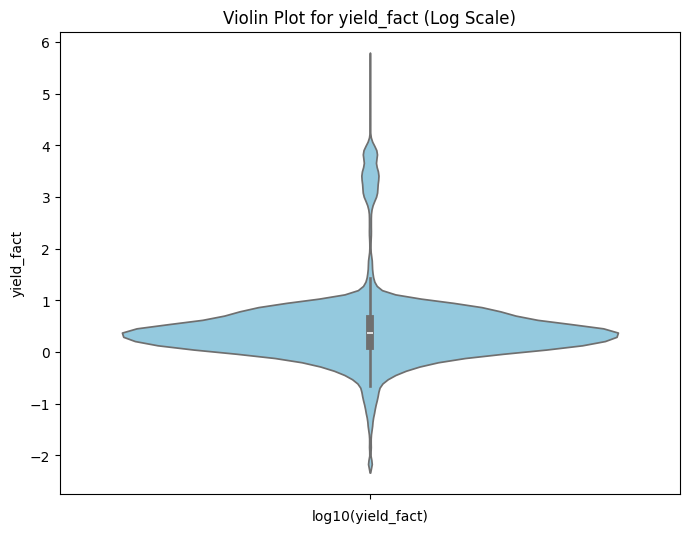

In [80]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['number'])

columns_per_row = 3
num_plots = len(numeric_columns.columns)
rows = math.ceil(num_plots / columns_per_row)

fig, axes = plt.subplots(rows, columns_per_row, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, column in enumerate(numeric_columns.columns):
    sns.violinplot(data=numeric_columns[column], ax=axes[i])
    axes[i].set_title(f"Violin Plot for {column}")
    axes[i].set_xlabel(column)

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

if 'yield_fact' in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=np.log10(numeric_columns['yield_fact']), color="skyblue")
    plt.title("Violin Plot for yield_fact (Log Scale)")
    plt.xlabel("log10(yield_fact)")
    plt.show()